# Project 2 - Kaggle Competition: Predicting Housing Prices in Ames, Iowa

# Problem Statement

As data analysts at a property agency in Ames, Iowa, we are tasked with conducting statistical analysis of housing transactions in Ames to identify prominent house features which affect house prices.

We will create a regression model based on the Ames Housing Dataset. This model will predict the price of a house at sale based on the dataset which we retrieved from [Kaggle](https://www.kaggle.com/c/dsi-us-6-project-2-regression-challenge).

The Ames Housing Dataset is an exceptionally detailed and robust dataset with over 70 columns of different features relating to houses and we will identify which features will best predict housing prices in Ames.

Kaggle has provided us with 2 datasets: a train.csv to train our model with and a test.csv which we will fit our model into and make housing price predictions.

Our understanding of the prominent features and price predictions will be crucial to provide advice to potential home sellers who might be considering to sell their house in Ames and would want to know what future price estimates may be so that they can adjust their ask price appropriately and market their homes effectively.


## Workflow

The project has been divided into 2 parts:
1. This notebook contains the data cleaning of both train and test datasets. Additionally, it contains the EDA of train dataset
2. The next notebook will consist of preprocessing of both train and test dataset as well as the predictions for the test set using 3 models: Linear Regression, Lasso Regression and Ridge Regression. We then choose the model with the lowest root mean square error to predict the saleprice in the test set.

# Data Cleaning of Train Dataset

Importing the neccesary libraries for data cleaning and EDA

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Setting display range so that we are able to view more of our datasets

In [3]:
#pd.set_option('display.max_rows', 3000)
#pd.set_option('display.max_columns', 150)

The display range is set to active during the initial data cleaning phase to display the full dataframe. It is currently set to comments as the notebook will lag when re-running the whole notebook.

Reading in train dataset

In [4]:
train = pd.read_csv('../datasets/train.csv')

In [5]:
train.shape

(2051, 81)

In [6]:
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


We will create a function to approximately rename our dataset columns

In [7]:
# a function to format columns appropriately

def format_column_name(df):
    '''converts column names into lowercase, replace commas and forward slash with underscore'''
    df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace('/', '_')
    return df

We will format feature names of the train dataset appropriately by calling our function: format_column_name.

In [8]:
format_column_name(train)

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,1587,921126030,20,RL,79.0,11449,Pave,NaN,IR1,HLS,...,0,0,NaN,NaN,NaN,0,1,2008,WD,298751
2047,785,905377130,30,RL,NaN,12342,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2009,WD,82500
2048,916,909253010,50,RL,57.0,7558,Pave,NaN,Reg,Bnk,...,0,0,NaN,NaN,NaN,0,3,2009,WD,177000
2049,639,535179160,20,RL,80.0,10400,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,11,2009,WD,144000


## Check that data types for each column is appropriate

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2051 non-null   int64  
 1   pid              2051 non-null   int64  
 2   ms_subclass      2051 non-null   int64  
 3   ms_zoning        2051 non-null   object 
 4   lot_frontage     1721 non-null   float64
 5   lot_area         2051 non-null   int64  
 6   street           2051 non-null   object 
 7   alley            140 non-null    object 
 8   lot_shape        2051 non-null   object 
 9   land_contour     2051 non-null   object 
 10  utilities        2051 non-null   object 
 11  lot_config       2051 non-null   object 
 12  land_slope       2051 non-null   object 
 13  neighborhood     2051 non-null   object 
 14  condition_1      2051 non-null   object 
 15  condition_2      2051 non-null   object 
 16  bldg_type        2051 non-null   object 
 17  house_style   

Data types looks good.

## Check for missing values for train dataset

In [10]:
train.isnull().sum().sort_values(ascending=False)

pool_qc         2042
misc_feature    1986
alley           1911
fence           1651
fireplace_qu    1000
                ... 
heating_qc         0
central_air        0
electrical         0
1st_flr_sf         0
saleprice          0
Length: 81, dtype: int64

Let us have a look at the list of missing values by percentage basis, ranked from the largest to lowest. We can do this by using the .mean() since .isnull() would represent missing values as True or False which are represented in 1 and 0.

In [11]:
train.isnull().mean().sort_values(ascending=False)

pool_qc         0.995612
misc_feature    0.968308
alley           0.931741
fence           0.804973
fireplace_qu    0.487567
                  ...   
heating_qc      0.000000
central_air     0.000000
electrical      0.000000
1st_flr_sf      0.000000
saleprice       0.000000
Length: 81, dtype: float64

We will drop columns with high percentage of null values, defined as more than 33% of missing values.
Therefore, we will drop the columns: pool_qc, misc_feature, alley, fence and fireplace_qu

In [12]:
drop_cols = ['pool_qc', 'misc_feature', 'alley', 'fence', 'fireplace_qu']
train = train.drop(drop_cols, axis=1)

We will also use the id column as the index.

In [13]:
train.set_index('id', inplace=True)
train.head()

,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,...,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice
id,,,,,,,,,,,,,,,,,,,,,
109,533352170,60,RL,NaN,13517,Pave,IR1,Lvl,AllPub,CulDSac,...,44,0,0,0,0,0,3,2010,WD,130500
544,531379050,60,RL,43.0,11492,Pave,IR1,Lvl,AllPub,CulDSac,...,74,0,0,0,0,0,4,2009,WD,220000
153,535304180,20,RL,68.0,7922,Pave,Reg,Lvl,AllPub,Inside,...,52,0,0,0,0,0,1,2010,WD,109000
318,916386060,60,RL,73.0,9802,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,4,2010,WD,174000
255,906425045,50,RL,82.0,14235,Pave,IR1,Lvl,AllPub,Inside,...,59,0,0,0,0,0,3,2010,WD,138500


### Summary of missing values and suggested actions

|Feature|Variable Type|Missing Value|Notes|Action|
|---|---|---|---|---|
|lot_frontage|Continuous|330|Missing value|impute NaN values with median value|
|alley|1911|Nominal|NaN because no alley access|drop data because too many NaN|
|mas_vnr_type|Nominal|22|Missing value|set null values to None, check 'None' rows should have mas_vnr_area = 0|
|mas_vnr_area|Continuous|22|Missing value|set null values to 0, check '0' rows should have mas_vnr_type = 'None|
|bsmt_qual|Ordinal|55|NaN because no basement|set null values to None|
|bsmt_cond|Ordinal|55|NaN because no basement|set null values to None|
|bsmt_exposure|Ordinal|58|3 more rows than bsmt_qual|drop the extra rows, set null values to None|
|bsmtfin_type_1|Ordinal|55|Missing value|set null values to None|
|bsmtfin_sf_1|Continuous|1|Missing value|set null values to 0|
|bsmtfin_type_2|Ordinal|56|55 no basement, 1 missing value|delete row with missing value, set null values to None|
|bsmtfin_sf_2|Continuous|1|NaN because no basement|set null values to 0|
|bsmt_unf_sf|Continuous|1|NaN because no basement|set null values to 0|
|total_bsmt_sf|Continuous|1|NaN because no basement|set null values to 0|
|bsmt_full_bath|Discrete|2|NaN because no basement|set null values to 0|
|bsmt_half_bath|Discrete|2|NaN because no basement|set null values to 0|
|fireplace_qu|Ordinal|1000|NaN because no fireplace|drop data because too many NaN|
|garage_type|Nominal|113|113 no garages|drop missing value row, set null values to None|
|garage_yr_blt|Discrete|114|113 no garages, 1 missing value|drop missing value row, set null values to 0|
|garage_finish|Ordinal|114|113 no garages, 1 missing value|drop missing value row, set null values to None|
|garage_cars|Discrete|1|missing value|drop missing value row|
|garage_area|Continuous|1|missing value|drop missing value row|
|garage_qual|Ordinal|114|113 no garages, 1 missing value|drop missing value row, set null values to None|
|garage_cond|Ordinal|114|113 no garages, 1 missing value|drop missing value row, set null values to None|
|pool_qc|Ordinal|2042|NaN because no pool|drop data because too many NaN|
|fence|Ordinal|1651|NaN because no fence|drop data because too many NaN|
|misc_feature|Continuous|1986|NaN because no misc feature|drop data because too many NaN|

### Data cleaning for training dataset
### Neighborhood column

Although there are no missing data for the neighborhood column, we need to check that the data corresponds to the [data dictionary](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt) provided

In [14]:
# extracted from data dictionary
datadict_nh = [
            'Blmngtn',
            'Blueste',
            'BrDale',
            'BrkSide',
            'ClearCr',
            'CollgCr',
            'Crawfor',
            'Edwards',
            'Gilbert',
            'IDOTRR',
            'MeadowV',
            'Mitchel',
            'Names',
            'NoRidge',
            'NPkVill',
            'NridgHt',
            'NWAmes',
            'OldTown',
            'SWISU',
            'Sawyer',
            'SawyerW',
            'Somerst',
            'StoneBr',
            'Timber',
            'Veenker'
    ]

# putting strings to lowercase
datadict_nh = [x.lower() for x in datadict_nh]

In [15]:
len(datadict_nh)

25

In [16]:
# using set() to create a unique set of neighborhood names
train_nh = set(train['neighborhood'])
train_nh = [x.lower() for x in train_nh]

Let us examine if there are neighborhoods listed in the train dataset which are not listed in the data dictionary.

In [17]:
not_listed = list()
for i in train_nh:
    if i not in datadict_nh:
        not_listed.append(i)
not_listed

['landmrk', 'greens', 'grnhill']

There are 3 neighborhoods: greens, grnhill and landmrk which are not in the data dictionary. We will proceed to find the rows which have these neighbhorhoods.

In [18]:
train[(train['neighborhood'].str.lower() == 'landmrk') |
      (train['neighborhood'].str.lower() == 'grnhill') |
      (train['neighborhood'].str.lower() == 'greens')
     ]

,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,...,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice
id,,,,,,,,,,,,,,,,,,,,,
2257,916253320,120,RM,NaN,9763,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,0,9,2007,WD,330000
2521,533253090,120,RL,40.0,3874,Pave,IR1,Lvl,AllPub,Inside,...,78,0,0,0,0,0,7,2006,WD,190000
2789,907230240,160,RH,NaN,3612,Pave,IR1,Lvl,AllPub,Inside,...,48,0,0,0,0,0,6,2006,WD,137000
2893,916252170,120,RM,NaN,8239,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,0,11,2006,WD,230000
108,533253210,120,RL,40.0,3880,Pave,IR1,Lvl,AllPub,Inside,...,78,0,0,0,0,0,1,2010,WD,206000
2522,533253160,120,RL,40.0,3876,Pave,IR1,Lvl,AllPub,Inside,...,60,0,0,0,0,0,7,2006,WD,170000


There are 6 rows which has neighborhoods not in the data dictionary. We will delete these rows so that we don't run into problems later. 

In [19]:
train.shape

(2051, 75)

In [20]:
train = train[~((train['neighborhood'].str.lower() == 'landmrk') |
              (train['neighborhood'].str.lower() == 'grnhill') |
              (train['neighborhood'].str.lower() == 'greens'))
             ]

In [21]:
train.shape

(2045, 75)

### Veneer columns

In [22]:
train['mas_vnr_area'].isnull().sum()

22

Firstly, we need to check if the 22 rows with "mas_vnr_area" = NaN also have "mas_vnr_type" = NaN since you cannot have veneer areas if there is no veneer.

In [23]:
train.loc[train['mas_vnr_area'].isnull(), ['mas_vnr_area', 'mas_vnr_type']]

,mas_vnr_area,mas_vnr_type
id,,
2393,NaN,NaN
2383,NaN,NaN
539,NaN,NaN
518,NaN,NaN
2824,NaN,NaN
1800,NaN,NaN
1455,NaN,NaN
1120,NaN,NaN
1841,NaN,NaN


Ensuring that the above number of rows = 22 by checking the shape

In [24]:
train[train['mas_vnr_area'].isnull()].shape

(22, 75)

For mas_vnr_area column, we will fill the null values with 0.

In [25]:
train['mas_vnr_area'] = train['mas_vnr_area'].fillna(0)

Double checking that all null values are filled.

In [26]:
train['mas_vnr_area'].isnull().sum()

0

Let's look at the types of values for mas_vnr_type

In [27]:
train['mas_vnr_type'].value_counts(dropna=False)

None       1213
BrkFace     629
Stone       168
NaN          22
BrkCmn       13
Name: mas_vnr_type, dtype: int64

For mas_vnr_type column, we will fill the null values with None.

In [28]:
train['mas_vnr_type'] = train['mas_vnr_type'].fillna('None')

Double checking that all null values are filled.

In [29]:
train['mas_vnr_type'].isnull().sum()

0

It is not possible for any house to have no veneer type yet have area > 0. Let's check for any rows that have veneer area > 0 but veneer type is None .

In [30]:
train.loc[(train['mas_vnr_area'] > 0) &
      (train['mas_vnr_type'] == 'None'),
      ['mas_vnr_area', 'mas_vnr_type']
     ]

,mas_vnr_area,mas_vnr_type
id,,
1862,1.0,None
2529,288.0,None
1914,1.0,None
2004,1.0,None
364,344.0,None


Let's set these rows for veneer area = 0

In [31]:
train.loc[(train['mas_vnr_type'] == 'None'), ['mas_vnr_area']] = 0

### Basement columns

Column: bsmt_qual - Let's check the values for the column

In [32]:
train['bsmt_qual'].value_counts(dropna=False)

TA     887
Gd     859
Ex     184
Fa      60
NaN     54
Po       1
Name: bsmt_qual, dtype: int64

As per the data dictionary, since bsmt_qual is an ordinal variable, we should change all NaN values into 'None'

In [33]:
train['bsmt_qual'].isnull().sum()

54

We will use fillna('None') on NaN values on bsmt_qual column

In [34]:
train['bsmt_qual'] = train['bsmt_qual'].fillna('None')

Double check that all NaN values are filled

In [35]:
train['bsmt_qual'].isnull().sum()

0

Column: bsmt_cond - Let's check the values for the column

In [36]:
train['bsmt_cond'].value_counts(dropna=False)

TA     1829
Gd       89
Fa       65
NaN      54
Po        5
Ex        3
Name: bsmt_cond, dtype: int64

Similar to bsmt_qual column, we will replace all NaN values to 'None'

In [37]:
train['bsmt_cond'].isnull().sum()

54

In [38]:
train['bsmt_cond'] = train['bsmt_cond'].fillna('None')

Double check that all NaN values are filled

In [39]:
train['bsmt_cond'].isnull().sum()

0

Column: bsmt_exposure - Let's check the values for the column

bsmt_exposure column has 3 more NaN rows than bsmt_qual and bsmt_cond columns. Let's look at these 3 rows.

In [40]:
train.loc[((train['bsmt_exposure'].isnull()) & 
          (train['bsmt_qual'].notnull()) &
          (train['bsmt_cond'].notnull())), ['bsmt_qual', 'bsmt_cond', 'bsmt_exposure']]

,bsmt_qual,bsmt_cond,bsmt_exposure
id,,,
807,None,None,NaN
811,None,None,NaN
781,None,None,NaN
888,None,None,NaN
1554,None,None,NaN
2740,None,None,NaN
2242,None,None,NaN
2745,None,None,NaN
84,None,None,NaN


In [41]:
train.shape

(2045, 75)

Clearly these rows have basement so bsmt_exposure should not have been NaN. We can drop them since it is only a small amount
If there are more rows, it may make sense to find the mode/median/mean and replace those values appropriately

In [42]:
train.drop(index=[1797,67,2780], inplace=True)

Double check that 3 rows are dropped

In [43]:
train.shape

(2042, 75)

Similarly, we will change all NaN values into 'None' and double check them.

In [44]:
train['bsmt_exposure'].isnull().sum()

54

In [45]:
train['bsmt_exposure'] = train['bsmt_exposure'].fillna('None')

In [46]:
train['bsmt_exposure'].isnull().sum()

0

Column: bsmtfin_type_1 - Let's check the values for the column

In [47]:
train['bsmtfin_type_1'].value_counts(dropna=False)

GLQ    610
Unf    600
ALQ    293
BLQ    200
Rec    183
LwQ    102
NaN     54
Name: bsmtfin_type_1, dtype: int64

We can assume that the NaN values refer to NA which is no basement. We will change the NaN values to 'None' and double check.

In [48]:
train['bsmtfin_type_1'].isnull().sum()

54

In [49]:
train['bsmtfin_type_1'] = train['bsmtfin_type_1'].fillna('None')

In [50]:
train['bsmtfin_type_1'].isnull().sum()

0

In [51]:
train['bsmtfin_type_1'].value_counts()

GLQ     610
Unf     600
ALQ     293
BLQ     200
Rec     183
LwQ     102
None     54
Name: bsmtfin_type_1, dtype: int64

Column: bsmtfin_sf_1 - Let's check the values for the column

This column only has 1 row which has NaN, we will look it up.

In [52]:
train.loc[train['bsmtfin_sf_1'].isnull(), :]

,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,...,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice
id,,,,,,,,,,,,,,,,,,,,,
1342,903230120,20,RM,99.0,5940,Pave,IR1,Lvl,AllPub,FR3,...,0,0,0,0,0,0,4,2008,ConLD,79000


We notice that the row has no basement. Therefore we can fill the NaN value with 0

In [53]:
train['bsmtfin_sf_1'] = train['bsmtfin_sf_1'].fillna(0)

Double check NaN values is filled

In [54]:
train['bsmtfin_sf_1'].isnull().sum()

0

Column: bsmtfin_type_2 - Let's check the values for the column

In [55]:
train['bsmtfin_type_2'].value_counts(dropna=False)

Unf    1743
Rec      79
LwQ      60
NaN      55
BLQ      48
ALQ      34
GLQ      23
Name: bsmtfin_type_2, dtype: int64

This column has similar missing values issue as bsmtfin_type_1.

In [56]:
train['bsmtfin_type_2'].isnull().sum()

55

For the rows with NaN values, we can also cross check with bsmt_qual and total_bsmt_sf to see if they have basements

In [57]:
train.loc[train['bsmtfin_type_2'].isnull(), ['bsmtfin_type_2', 'bsmt_qual', 'total_bsmt_sf']]

,bsmtfin_type_2,bsmt_qual,total_bsmt_sf
id,,,
807,NaN,None,0.0
811,NaN,None,0.0
781,NaN,None,0.0
888,NaN,None,0.0
1554,NaN,None,0.0
2740,NaN,None,0.0
2242,NaN,None,0.0
2745,NaN,None,0.0
84,NaN,None,0.0


Let's look closer at row ID 445 by searching index = 445:

In [58]:
train.loc[[445], :]

,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,...,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice
id,,,,,,,,,,,,,,,,,,,,,
445,528142130,20,RL,85.0,10655,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,0,10,2009,WD,284000


With the exception of row with id = 445, the rest of the rows have total_bsmt_sf = 0 (meaning no basement). We can delete row with id = 445 and fillna('None') to the rest of the rows.

In [59]:
train.shape

(2042, 75)

In [60]:
train.drop(445, inplace=True)

In [61]:
train.shape

(2041, 75)

We can convert the remaining rows with NaN values to 'None'

In [62]:
train.loc[train['bsmtfin_type_2'].isnull(), ['bsmtfin_type_2', 'bsmt_qual']].shape

(54, 2)

In [63]:
train['bsmtfin_type_2'] = train['bsmtfin_type_2'].fillna('None')

Ensure that NaN values are filled

In [64]:
train['bsmtfin_type_2'].isnull().sum()

0

Column: bsmtfin_sf_2 - Let's check the values for the column

In [65]:
train['bsmtfin_sf_2'].isnull().sum()

1

Since there is only 1 row with NaN, let's look it up

In [66]:
train.loc[train['bsmtfin_sf_2'].isnull(), 'bsmt_qual':]

,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,...,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice
id,,,,,,,,,,,,,,,,,,,,,
1342,None,None,None,None,0.0,None,NaN,NaN,NaN,GasA,...,0,0,0,0,0,0,4,2008,ConLD,79000


We note that there is no basement for this row. We will convert the NaN value to 0.

In [67]:
train['bsmtfin_sf_2'] = train['bsmtfin_sf_2'].fillna(0)

Ensure that NaN values are filled

In [68]:
train['bsmtfin_sf_2'].isnull().sum()

0

Column: bsmt_unf_sf - Let's check the values for the column

This column has the same issue as column: bsmtfin_sf_2. We will repeat the same steps.

In [69]:
train['bsmt_unf_sf'].isnull().sum()

1

In [70]:
train.loc[train['bsmt_unf_sf'].isnull(), 'bsmt_qual':]

,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,...,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice
id,,,,,,,,,,,,,,,,,,,,,
1342,None,None,None,None,0.0,None,0.0,NaN,NaN,GasA,...,0,0,0,0,0,0,4,2008,ConLD,79000


In [71]:
train['bsmt_unf_sf'] = train['bsmt_unf_sf'].fillna(0)

Ensure that NaN values are filled

In [72]:
train['bsmtfin_sf_2'].isnull().sum()

0

Column: total_bsmt_sf - Let's check the values for the column

This column has the same issue as column: bsmtfin_sf_2. We will repeat the same steps.

In [73]:
train['total_bsmt_sf'].isnull().sum()

1

In [74]:
train.loc[train['total_bsmt_sf'].isnull(), 'bsmt_qual':]

,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,...,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice
id,,,,,,,,,,,,,,,,,,,,,
1342,None,None,None,None,0.0,None,0.0,0.0,NaN,GasA,...,0,0,0,0,0,0,4,2008,ConLD,79000


In [75]:
train['total_bsmt_sf'] = train['total_bsmt_sf'].fillna(0)

In [76]:
train['total_bsmt_sf'].isnull().sum()

0

Column: bsmt_full_bath - Let's check the values for the column

This column has the same issue as column: bsmtfin_sf_2. We will repeat the same steps.

In [77]:
train['bsmt_full_bath'].isnull().sum()

2

In [78]:
train.loc[train['bsmt_full_bath'].isnull(), 'bsmt_qual':]

,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,...,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice
id,,,,,,,,,,,,,,,,,,,,,
1498,None,None,None,None,0.0,None,0.0,0.0,0.0,GasA,...,372,0,0,0,0,0,7,2008,WD,284700
1342,None,None,None,None,0.0,None,0.0,0.0,0.0,GasA,...,0,0,0,0,0,0,4,2008,ConLD,79000


In [79]:
train['bsmt_full_bath'] = train['bsmt_full_bath'].fillna(0)

In [80]:
train['bsmt_full_bath'].isnull().sum()

0

Column: bsmt_half_bath - Let's check the values for the column

In [81]:
train['bsmt_half_bath'].isnull().sum()

2

Let's look it up the rows

In [82]:
train.loc[train['bsmt_half_bath'].isnull(), 'bsmt_qual':]

,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,...,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice
id,,,,,,,,,,,,,,,,,,,,,
1498,None,None,None,None,0.0,None,0.0,0.0,0.0,GasA,...,372,0,0,0,0,0,7,2008,WD,284700
1342,None,None,None,None,0.0,None,0.0,0.0,0.0,GasA,...,0,0,0,0,0,0,4,2008,ConLD,79000


Since there is no basement, convert NaN value to 0

In [83]:
train['bsmt_half_bath'] = train['bsmt_half_bath'].fillna(0)

Ensure NaN values are filled

In [84]:
train['bsmt_half_bath'].isnull().sum()

0

### Garage columns

Columns: garage_type, garage_yr_blt, garage_finish, garage_qual, garage_cond

In [85]:
train['garage_type'].isnull().sum()

113

In [86]:
train['garage_yr_blt'].isnull().sum()

114

In [87]:
train['garage_finish'].isnull().sum()

114

In [88]:
train['garage_qual'].isnull().sum()

114

In [89]:
train['garage_cond'].isnull().sum()

114

Let's first look it up the 1 row which garage_yr_blt, garage_finish, garage_qual & garage_cond = NaN but garage_type != NaN

In [90]:
train.loc[train['garage_type'].notnull() &
          train['garage_qual'].isnull() &
          train['garage_cond'].isnull() &
          train['garage_yr_blt'].isnull() &
          train['garage_finish'].isnull(), :]

,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,...,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice
id,,,,,,,,,,,,,,,,,,,,,
2237,910201180,70,RM,50.0,9060,Pave,Reg,Lvl,AllPub,Inside,...,0,212,0,0,0,0,3,2007,WD,150909


In [91]:
train.shape

(2041, 75)

We will drop this row since there is missing value

In [92]:
train.drop(2237, inplace=True)

In [93]:
train.shape

(2040, 75)

We will convert the rest of 113 rows with NaN values into 'None' and 0 respectively based on data types (ordinal, discrete, continuous).

In [94]:
train['garage_type'] = train['garage_type'].fillna('None')
train['garage_yr_blt'] = train['garage_yr_blt'].fillna(0)
train['garage_finish'] = train['garage_finish'].fillna('None')
train['garage_qual'] = train['garage_qual'].fillna('None')           
train['garage_cond'] = train['garage_cond'].fillna('None')

Ensure NaN value is filled

In [95]:
print(train['garage_type'].isnull().sum())
print(train['garage_yr_blt'].isnull().sum())
print(train['garage_finish'].isnull().sum())
print(train['garage_qual'].isnull().sum())
print(train['garage_cond'].isnull().sum())

0
0
0
0
0


### Lot frontage column

In [96]:
train['lot_frontage'].isnull().sum()

327

Based on the data dictionary, lot frontage is defined as continuous variable of Linear feet of street connected to property. It is unlikely for houses to not have lot frontage so we can't just fillna(0 or 'None')

Based on further research on [lot frontage definition](https://www.lawinsider.com/dictionary/lot-frontage), it is the horizontal distance between the sides of lot line and it shouldn't be zero.

In [97]:
train['lot_frontage'].describe()

count    1713.000000
mean       69.100992
std        23.273209
min        21.000000
25%        58.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: lot_frontage, dtype: float64

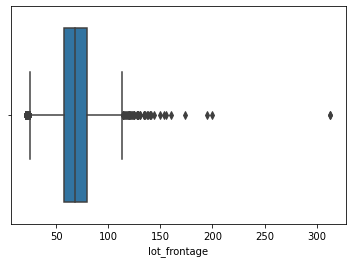

In [98]:
sns.boxplot(x=train['lot_frontage']);

Although there are outliers, visually they do not seem to much impact on the regularity of the box plot. Let's keep them and instead impute the NaN values with the median (median = 68)

In [99]:
train['lot_frontage'] = train['lot_frontage'].replace(np.nan, train['lot_frontage'].median())

In [100]:
train['lot_frontage'].isnull().sum()

0

In [101]:
train['lot_frontage'].describe()

count    2040.000000
mean       68.924510
std        21.329342
min        21.000000
25%        60.000000
50%        68.000000
75%        78.000000
max       313.000000
Name: lot_frontage, dtype: float64

Ensure NaN values are filled

In [102]:
train.isnull().sum()

pid             0
ms_subclass     0
ms_zoning       0
lot_frontage    0
lot_area        0
               ..
misc_val        0
mo_sold         0
yr_sold         0
sale_type       0
saleprice       0
Length: 75, dtype: int64

### Checking non numeric columns 

We would like to look out for any unique labels as well as determine if column is categorical or ordinal

In [103]:
train_objects = train.select_dtypes(include=['object'])
train_objects.shape

(2040, 37)

In [104]:
for x in range(37):
    print('column name: ', train_objects.columns[x])
    print('missing values: ', train_objects.iloc[:, x].isnull().sum())
    print(train_objects.iloc[:, x].value_counts())
    print()

column name:  ms_zoning
missing values:  0
RL         1592
RM          313
FV          100
C (all)      19
RH           13
A (agr)       2
I (all)       1
Name: ms_zoning, dtype: int64

column name:  street
missing values:  0
Pave    2033
Grvl       7
Name: street, dtype: int64

column name:  lot_shape
missing values:  0
Reg    1292
IR1     684
IR2      55
IR3       9
Name: lot_shape, dtype: int64

column name:  land_contour
missing values:  0
Lvl    1832
HLS      85
Bnk      80
Low      43
Name: land_contour, dtype: int64

column name:  utilities
missing values:  0
AllPub    2038
NoSewr       1
NoSeWa       1
Name: utilities, dtype: int64

column name:  lot_config
missing values:  0
Inside     1493
Corner      347
CulDSac     131
FR2          60
FR3           9
Name: lot_config, dtype: int64

column name:  land_slope
missing values:  0
Gtl    1942
Mod      88
Sev      10
Name: land_slope, dtype: int64

column name:  neighborhood
missing values:  0
NAmes      310
CollgCr    179
OldTown

Ordinal variables which we need to map into ordinal ranking values

- lot_shape should be ordinal since regularity is usually preferred
 - 3 - Reg: Regular
 - 2 - IR1: Slightly irregular
 - 1 - IR2: Moderately irregular
 - 0 - IR3: Irregular

- utilities should be ordinal
 - 3 - AllPub: All public Utilities (E,G,W,& S)
 - 2 - NoSewr: Electricity, Gas, and Water (Septic Tank)
 - 1 - NoSeWa: Electricity and Gas Only
 - 0 - ELO: Electricity only

- land_slope should be ordinal
 - 2 - Gtl: Gentle slope
 - 1 - Mod: Moderate Slope
 - 0 - Sev: Severe Slope
 
- bsmt_qual and bsmt_cond(create a mapper called bsmt_vals to map bsmt_qual and bsmt_cond into ordinal values)
 - 5 - Ex: Excellent
 - 4 - Gd: Good
 - 3 - TA: Typical
 - 2 - Fa: Fair
 - 1 - Po: Poor
 - 0 - None(previously NA): No Basement
 
- bsmt_exposure should be ordinal (create bsmt_expo_vals to map ordinal values)
 - 4 - Gd: Good Exposure
 - 3 - Av: Average Exposure
 - 2 - Mn: Minimum Exposure
 - 1 - No: No Exposure
 - 0 - None(previously NA): No Basement

- exter_qual should be ordinal (use bsmt_vals to map)

- exter_cond should be ordinal (use bsmt_vals to map)
 
- bsmtfin_type_1 and bsmtfin_type_2 should be ordinal
 - 6 - GLQ: Good Living Quarters
 - 5 - ALQ: Average Living Quarters
 - 4 - BLQ: Below Average Living Quarters
 - 3 - Rec: Average Rec Room
 - 2 - LwQ: Low Quality
 - 1 - Unf: Unfinished
 - 0 - None(previously NA): No Basement

- heating_qc should be ordinal (can use the same dictionary: bsmt_vals)

- electrical should be ordinal
 - 4 - SBrkr: Standard Circuit Breakers & Romex
 - 3 - FuseA: Fuse Box over 60 AMP and all Romex wiring (Average)
 - 2 - FuseF: 60 AMP Fuse Box and mostly Romex wiring (Fair)
 - 1 - FuseP: 60 AMP Fuse Box and mostly knob & tube wiring (poor)
 - 0 - Mix: Mixed

- kitchen_qual should be ordinal (can use the same dictionary: bsmt_vals)

- functional should be ordinal
 - 7 - Typ: Typical Functionality
 - 6 - Min1: Minor Deductions 1
 - 5 - Min2: Minor Deductions 2
 - 4 - Mod: Moderate Deductions
 - 3 - Maj1: Major Deductions 1
 - 2 - Maj2: Major Deductions 2
 - 1 - Sev: Severely Damaged
 - 0 - Sal: Salvage only

- garage_finish
 - 3 - Fin: Finished
 - 2 - RFn: Rough Finished
 - 1 - Unf: Unfinished
 - 0 - None(previously NA): No Garage

- garage_qual (can use the same dictionary: bsmt_vals)

- garage_cond (can use the same dictionary: bsmt_vals)

- paved_drive
 - 2 - Y: Paved
 - 1 - P: Partial Pavement
 - 0 - N: Dirt/Gravel

Let's create a set of ordinal ranking values for bsmt_qual

In [105]:
bsmt_vals = {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
train['bsmt_qual'] = train['bsmt_qual'].replace(bsmt_vals)

Ensure that the values are mapped correctly

In [106]:
train['bsmt_qual'].value_counts(dropna=False)

3    887
4    854
5    184
2     60
0     54
1      1
Name: bsmt_qual, dtype: int64

Let's create a set of ordinal ranking values for bsmt_cond

In [107]:
train['bsmt_qual'].value_counts(dropna=False)

3    887
4    854
5    184
2     60
0     54
1      1
Name: bsmt_qual, dtype: int64

Let's create a set of ordinal ranking values for bsmt_cond

In [108]:
train['bsmt_cond'] = train['bsmt_cond'].replace(bsmt_vals)

In [109]:
train['bsmt_cond'].value_counts(dropna=False)

3    1824
4      89
2      65
0      54
1       5
5       3
Name: bsmt_cond, dtype: int64

We will map ordinal ranking values to bsmt_exposure column

In [110]:
train['bsmt_exposure'].value_counts()

No      1335
Av       288
Gd       200
Mn       163
None      54
Name: bsmt_exposure, dtype: int64

In [111]:
bsmt_expo_vals = {'None': 0, 'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4}

In [112]:
train['bsmt_exposure'] = train['bsmt_exposure'].replace(bsmt_expo_vals)

In [113]:
train['bsmt_exposure'].value_counts()

1    1335
3     288
4     200
2     163
0      54
Name: bsmt_exposure, dtype: int64

For the remaining ordinal variables, we will map ordinal ranking values 

In [114]:
lot_vals = {'IR3': 0, 'IR2': 1, 'IR1': 2, 'Reg': 3}
util_vals = {'ELO': 0, 'NoSeWa': 1, 'NoSewr': 2, 'AllPub': 3}
slope_vals = {'Sev': 0, 'Mod': 1, 'Gtl': 2}
bsmt_fin_vals = {'None': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}
electric_vals = {'Mix': 0, 'FuseP': 1, 'FuseF': 2, 'FuseA': 3, 'SBrkr': 4}
func_vals = {'Sal': 0, 'Sev': 1, 'Maj2': 2, 'Maj1': 3, 'Mod': 4, 'Min2': 5, 'Min1': 6, 'Typ': 7}
gar_fin_vals = {'None': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3}
pav_vals = {'N': 0, 'P': 1, 'Y': 2}

In [115]:
train['lot_shape'] = train['lot_shape'].replace(lot_vals)
train['utilities'] = train['utilities'].replace(util_vals)
train['land_slope'] = train['land_slope'].replace(slope_vals)
train['exter_qual'] = train['exter_qual'].replace(bsmt_vals)
train['exter_cond'] = train['exter_cond'].replace(bsmt_vals)
train['bsmtfin_type_1'] = train['bsmtfin_type_1'].replace(bsmt_fin_vals)
train['bsmtfin_type_2'] = train['bsmtfin_type_2'].replace(bsmt_fin_vals)
train['heating_qc'] = train['heating_qc'].replace(bsmt_vals)
train['electrical'] = train['electrical'].replace(electric_vals)
train['kitchen_qual'] = train['kitchen_qual'].replace(bsmt_vals)
train['functional'] = train['functional'].replace(func_vals)
train['garage_finish'] = train['garage_finish'].replace(gar_fin_vals)
train['garage_qual'] = train['garage_qual'].replace(bsmt_vals)
train['garage_cond'] = train['garage_cond'].replace(bsmt_vals)
train['paved_drive'] = train['paved_drive'].replace(pav_vals)


Ensure that our values are mapped correctly

In [116]:
print(train['lot_shape'].value_counts())
print(train['utilities'].value_counts())
print(train['land_slope'].value_counts())
print(train['exter_qual'].value_counts()) 
print(train['exter_cond'].value_counts()) 
print(train['bsmtfin_type_1'].value_counts()) 
print(train['bsmtfin_type_2'].value_counts()) 
print(train['heating_qc'].value_counts()) 
print(train['electrical'].value_counts()) 
print(train['kitchen_qual'].value_counts()) 
print(train['functional'].value_counts()) 
print(train['garage_finish'].value_counts()) 
print(train['garage_qual'].value_counts())
print(train['garage_cond'].value_counts()) 
print(train['paved_drive'].value_counts())

3    1292
2     684
1      55
0       9
Name: lot_shape, dtype: int64
3    2038
1       1
2       1
Name: utilities, dtype: int64
2    1942
1      88
0      10
Name: land_slope, dtype: int64
3    1245
4     688
5      81
2      26
Name: exter_qual, dtype: int64
3    1767
4     215
2      49
5       7
1       2
Name: exter_cond, dtype: int64
6    609
1    600
5    292
4    200
3    183
2    102
0     54
Name: bsmtfin_type_1, dtype: int64
1    1742
3      79
2      60
0      54
4      48
5      34
6      23
Name: bsmtfin_type_2, dtype: int64
5    1058
3     594
4     318
2      67
1       3
Name: heating_qc, dtype: int64
4    1857
3     140
2      35
1       7
0       1
Name: electrical, dtype: int64
3    1046
4     796
5     151
2      47
Name: kitchen_qual, dtype: int64
7    1904
5      42
6      42
4      29
3      12
2       7
0       2
1       2
Name: functional, dtype: int64
1    847
2    575
3    505
0    113
Name: garage_finish, dtype: int64
3    1822
0     113
2      82
4      1

# Exploratory Data Analysis of Train Dataset

## Histograms for all numerical features

We will have a look at the distributions of all numerical features. These includes newly converted ordinal features

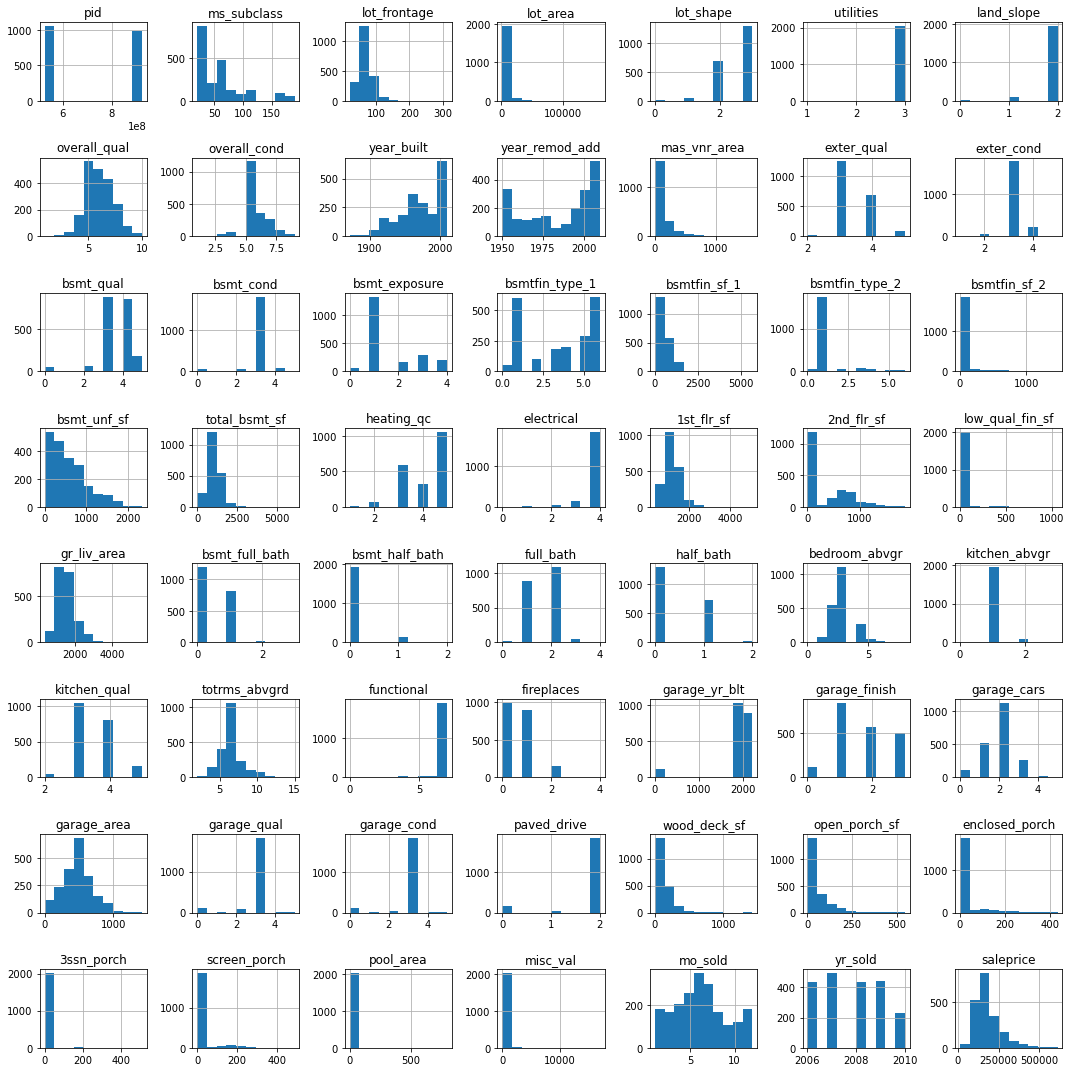

In [117]:
train.hist(figsize=(15,15))

plt.tight_layout();

Key observations:
- only features like garage_area and have a somewhat normal distribution
- most features have very distinct peaks at the extremities
- we see that most houses' overall qualities are average quality, ranged between 5 and 8

## Correlation Matrix of Ordinal, Discrete and Continuous Variables

Let us look at a heatmap with the variables to see if there are any multi collinearity between the ordinal, discrete and continuous features themselves

Let's group the variables by type: ordinal, discrete and continuous and measure for multi collinearity. Our threshold is to look for correlation of 0.7 and above.

We will look at ordinal variables first

In [118]:
ordinal = train[['lot_shape', 'utilities', 'land_slope', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure', 'exter_qual', 'exter_cond', 'bsmtfin_type_1', 'bsmtfin_type_2', 'heating_qc', 'electrical', 'kitchen_qual', 'functional', 'garage_finish', 'garage_qual', 'garage_cond', 'paved_drive']] 

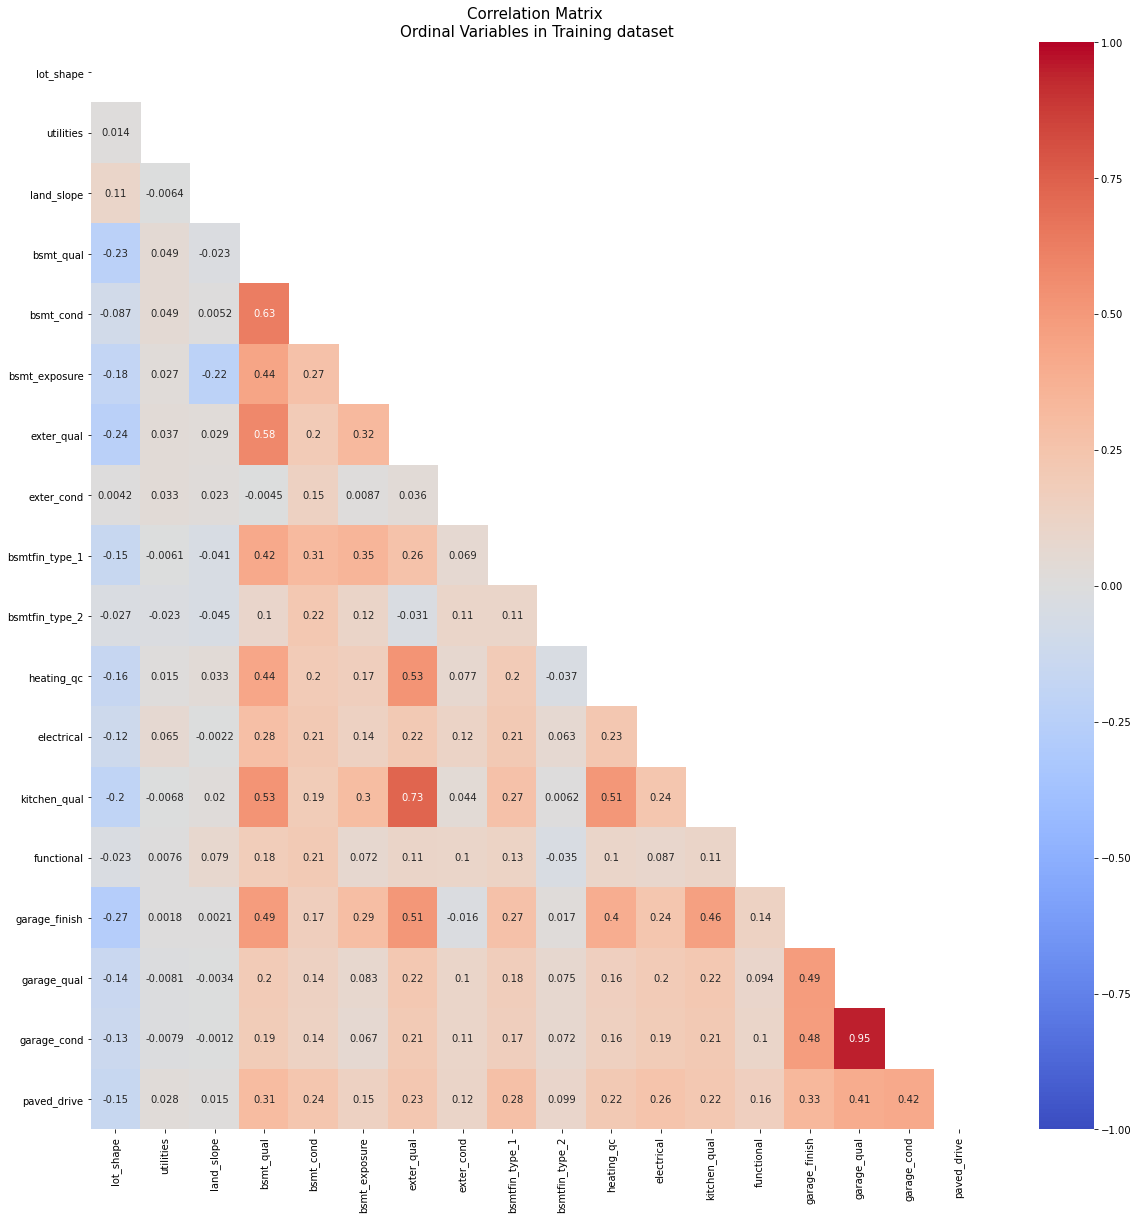

In [119]:
plt.figure(figsize=(20,20))
matrix = np.triu(ordinal.corr())

sns.heatmap(ordinal.corr(), annot=True, cmap='coolwarm', mask=matrix, vmin=-1, vmax=1);

plt.title('Correlation Matrix \nOrdinal Variables in Training dataset', size = 15);

- There is good positive correlation between kitchen_qual and exter_qual (0.73)
- Perhaps we can consider to drop exter_qual
- There is strong positive correlation between garage_cond and garage_qual (0.95)
- Perhaps we can consider to drop garage_qual

We will create a list of columns which we intend to drop off to concentrate on the more relevant features 

In [120]:
drop_list_col = ['exter_qual', 'garage_qual']

Next we will look at discrete variables

In [121]:
discrete = train[['year_built', 'year_remod_add', 'bsmt_full_bath', 'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr', 'kitchen_abvgr', 'totrms_abvgrd', 'fireplaces', 'garage_yr_blt', 'garage_cars', 'mo_sold', 'yr_sold']]

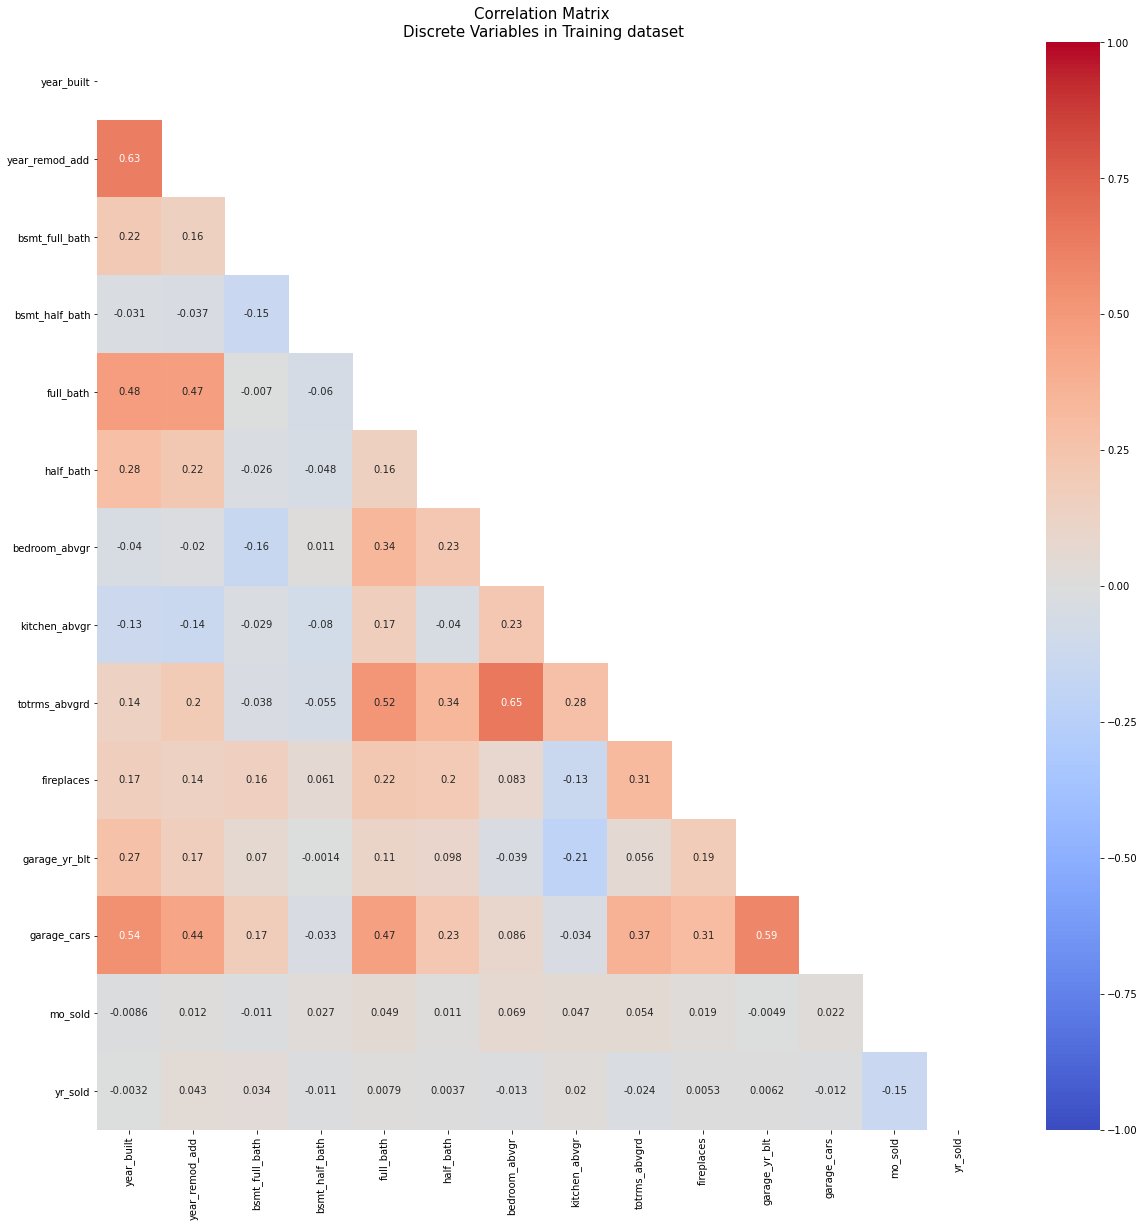

In [122]:
plt.figure(figsize=(20,20))
matrix = np.triu(discrete.corr())

sns.heatmap(discrete.corr(), annot=True, cmap='coolwarm', mask=matrix, vmin=-1, vmax=1);

plt.title('Correlation Matrix \nDiscrete Variables in Training dataset', size = 15);

- Overall, the discrete variables do not really correlate well to each other so let's keep all of them for now

Lastly, we will look at continuous variables

In [123]:
continuous = train[['lot_frontage', 'lot_area', 'mas_vnr_area', 'bsmtfin_sf_1', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf', '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'garage_area', 'wood_deck_sf', 'open_porch_sf', 'enclosed_porch', '3ssn_porch', 'screen_porch', 'pool_area', 'misc_val']]

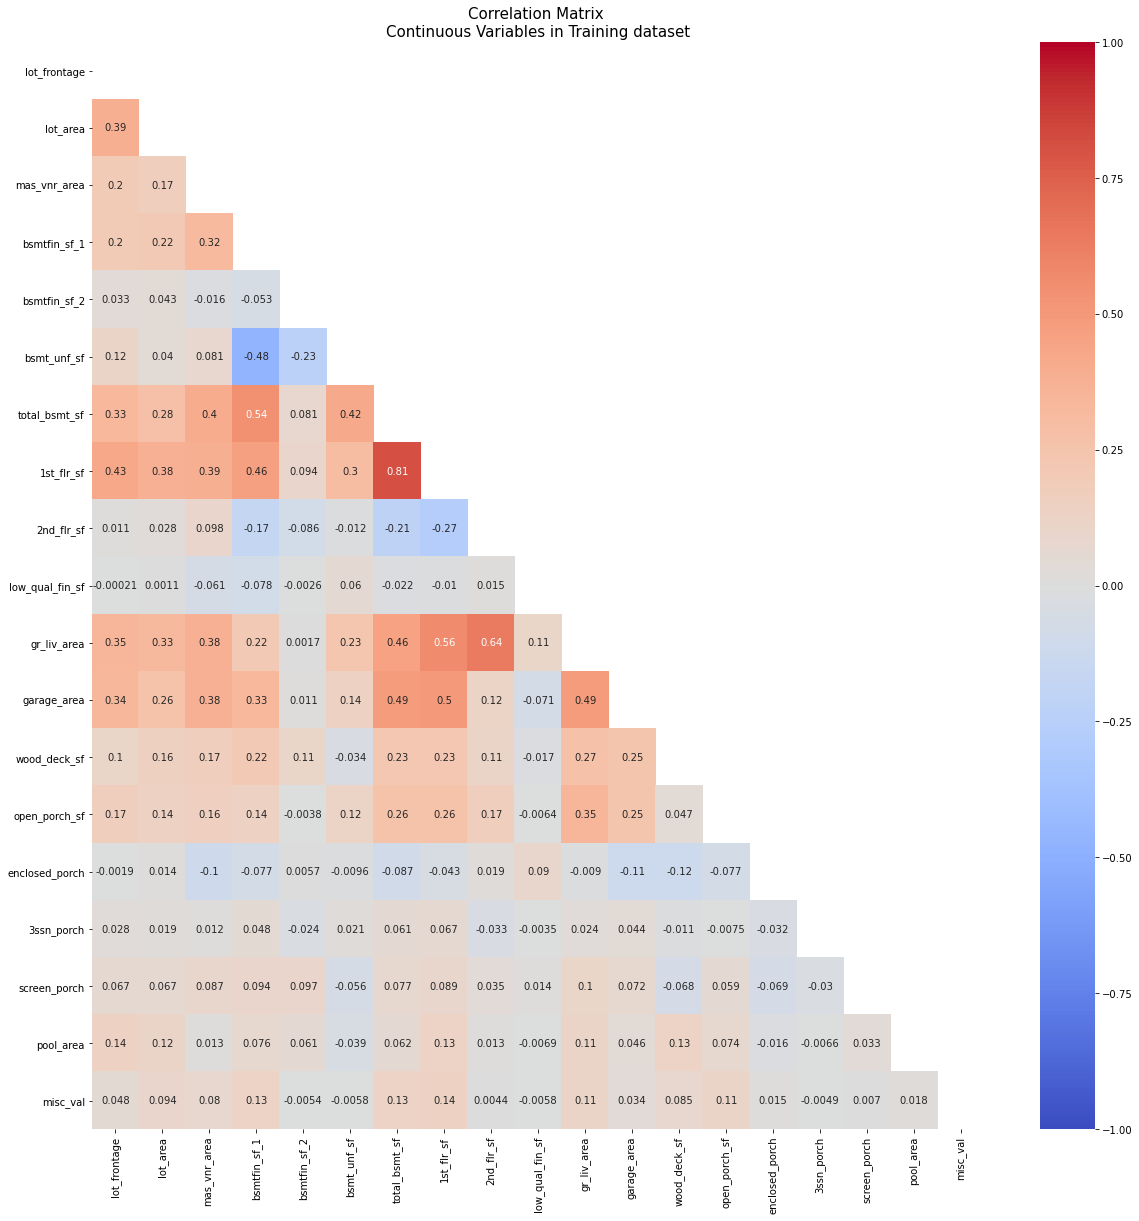

In [124]:
plt.figure(figsize=(20,20))
matrix = np.triu(continuous.corr())

sns.heatmap(continuous.corr(), annot=True, cmap='coolwarm', mask=matrix, vmin=-1, vmax=1);
plt.title('Correlation Matrix \nContinuous Variables in Training dataset', size = 15);

- There is strong positive correlation between 1st_flr_sf and total_bsmt_sf (0.81)
- Perhaps we can consider to drop total_bsmt_sf

In [125]:
drop_list_col.append('total_bsmt_sf')

## Correlation of Features Against Our Target (Saleprice)

In [126]:
train.head()

,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,...,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice
id,,,,,,,,,,,,,,,,,,,,,
109,533352170,60,RL,68.0,13517,Pave,2,Lvl,3,CulDSac,...,44,0,0,0,0,0,3,2010,WD,130500
544,531379050,60,RL,43.0,11492,Pave,2,Lvl,3,CulDSac,...,74,0,0,0,0,0,4,2009,WD,220000
153,535304180,20,RL,68.0,7922,Pave,3,Lvl,3,Inside,...,52,0,0,0,0,0,1,2010,WD,109000
318,916386060,60,RL,73.0,9802,Pave,3,Lvl,3,Inside,...,0,0,0,0,0,0,4,2010,WD,174000
255,906425045,50,RL,82.0,14235,Pave,2,Lvl,3,Inside,...,59,0,0,0,0,0,3,2010,WD,138500


Let's also look at correlation of numeric variables (including converted ordinal variables) with saleprice

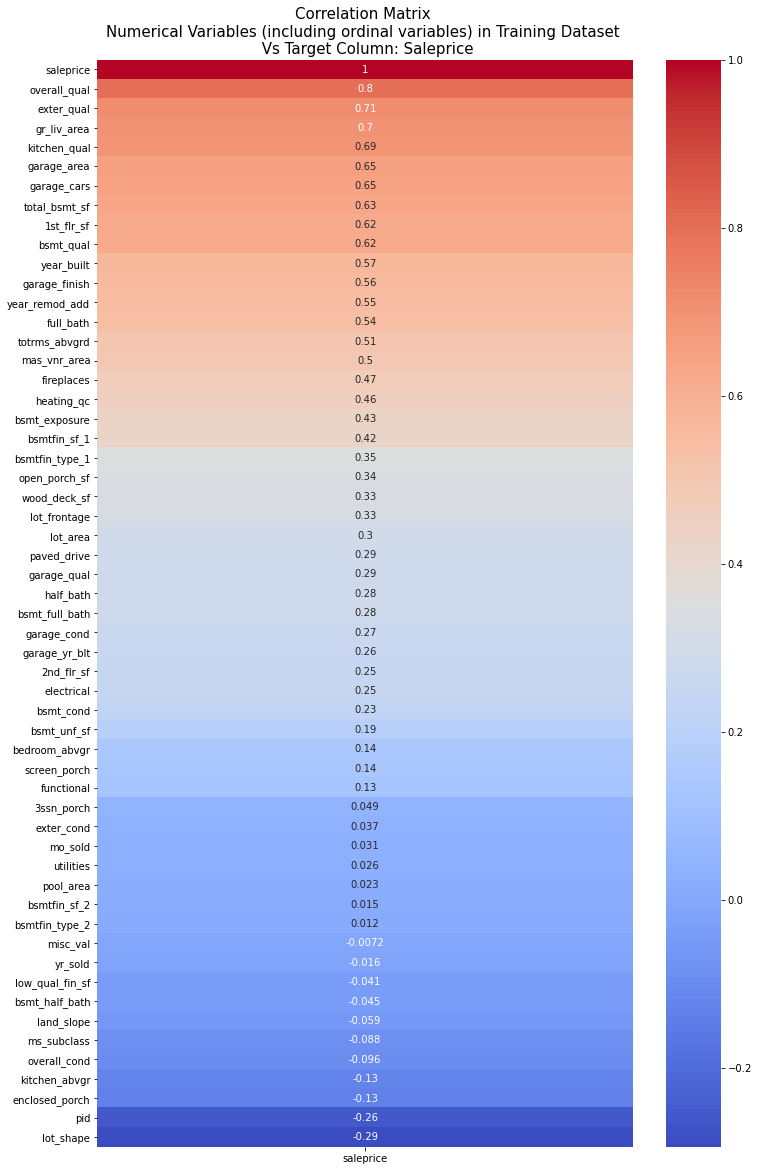

In [127]:
plt.figure(figsize=(12, 20))
data_corr = train.corr()[['saleprice']].sort_values('saleprice', ascending=False)

sns.heatmap(data_corr, cmap = 'coolwarm', annot=True);
plt.title('Correlation Matrix \nNumerical Variables (including ordinal variables) in Training Dataset \n Vs Target Column: Saleprice', size = 15);


- We should definitely drop PID column as they do not represent anything
- Top correlating features with saleprice are overall quality, ground living area, garage area, size of garage in car capacity


I would suggest to set a threshold as 0.2, i.e. to drop features with correlation of 0.2 or less

We will append a list of feature names based on features which did not meet the correlation of more than 0.2 with saleprice

In [128]:
data_corr

,saleprice
saleprice,1.000000
overall_qual,0.801515
exter_qual,0.712224
gr_liv_area,0.698446
kitchen_qual,0.692562
garage_area,0.651952
garage_cars,0.650254
total_bsmt_sf,0.631648
1st_flr_sf,0.618427
bsmt_qual,0.616094


In [129]:
data_corr.reset_index(inplace=True)
data_corr

,index,saleprice
0,saleprice,1.000000
1,overall_qual,0.801515
2,exter_qual,0.712224
3,gr_liv_area,0.698446
4,kitchen_qual,0.692562
5,garage_area,0.651952
6,garage_cars,0.650254
7,total_bsmt_sf,0.631648
8,1st_flr_sf,0.618427
9,bsmt_qual,0.616094


We take note that while filtering out correlations of less than or equal to 0.2, we take an absolute of it so that we do not accidentally take out highly negative correlated features which could useful for our predictions later. 

More specifically, we will be picking out features of correlations -0.2 to 0.2.

In [130]:
# applying np.abs to select features
data_corr.loc[np.abs(data_corr['saleprice'] <= 0.2), 'index']

34        bsmt_unf_sf
35      bedroom_abvgr
36       screen_porch
37         functional
38         3ssn_porch
39         exter_cond
40            mo_sold
41          utilities
42          pool_area
43       bsmtfin_sf_2
44     bsmtfin_type_2
45           misc_val
46            yr_sold
47    low_qual_fin_sf
48     bsmt_half_bath
49         land_slope
50        ms_subclass
51       overall_cond
52      kitchen_abvgr
53     enclosed_porch
54                pid
55          lot_shape
Name: index, dtype: object

We will add the features into the drop_list_col. Note that 'garage_qual' was previously added into this list earlier.

In [131]:
drop_list_col.extend(list(data_corr.loc[np.abs(data_corr['saleprice'] <= 0.2), 'index']))

In [132]:
drop_list_col

['exter_qual',
 'garage_qual',
 'total_bsmt_sf',
 'bsmt_unf_sf',
 'bedroom_abvgr',
 'screen_porch',
 'functional',
 '3ssn_porch',
 'exter_cond',
 'mo_sold',
 'utilities',
 'pool_area',
 'bsmtfin_sf_2',
 'bsmtfin_type_2',
 'misc_val',
 'yr_sold',
 'low_qual_fin_sf',
 'bsmt_half_bath',
 'land_slope',
 'ms_subclass',
 'overall_cond',
 'kitchen_abvgr',
 'enclosed_porch',
 'pid',
 'lot_shape']

In [133]:
len(drop_list_col)

25

Let us look at the top 5 features which have top correlation to saleprice

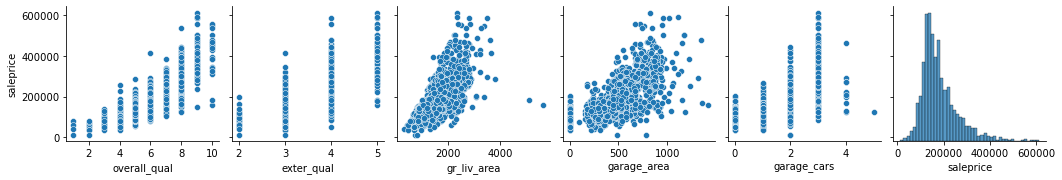

In [134]:
pair_features = ['overall_qual', 'exter_qual', 'gr_liv_area', 'garage_area', 'garage_cars', 'saleprice']

sns.pairplot(data=train, x_vars=pair_features, y_vars='saleprice');

**Observations:**
- larger ground living area usually leads to better overall quality, which means higher saleprice
- However, this is not necessary the case for the size of your garage area, as shown: small garage area can have varying overall quality
- Most houses are priced below $200,000

## Box Plots of Nominal Features

Finally, we shall observe the nominal features which we initially left out and see how well the categories within each feature help to differentiate the saleprice

In [135]:
cols = train.columns
num_cols = train._get_numeric_data().columns
nominal = list(set(cols) - set(num_cols))
nominal

['exterior_2nd',
 'land_contour',
 'central_air',
 'house_style',
 'foundation',
 'street',
 'mas_vnr_type',
 'neighborhood',
 'heating',
 'sale_type',
 'condition_2',
 'ms_zoning',
 'lot_config',
 'bldg_type',
 'garage_type',
 'roof_style',
 'roof_matl',
 'exterior_1st',
 'condition_1']

In [136]:
len(nominal)

19

There are 19 nominal features in this train dataset.

We will display box plots for each nominal feature to see if there are distinct categories within which differentiates saleprice. 

We may want to consider dropping features which have a lot of overlap of categories in terms of saleprice. For example, for 'central_air' feature (air conditioning), if there is a lot of overlap in saleprices for housing having and not having airconditioning, we may want to determine that air conditioning may not be a good indicator of predicting house prices.

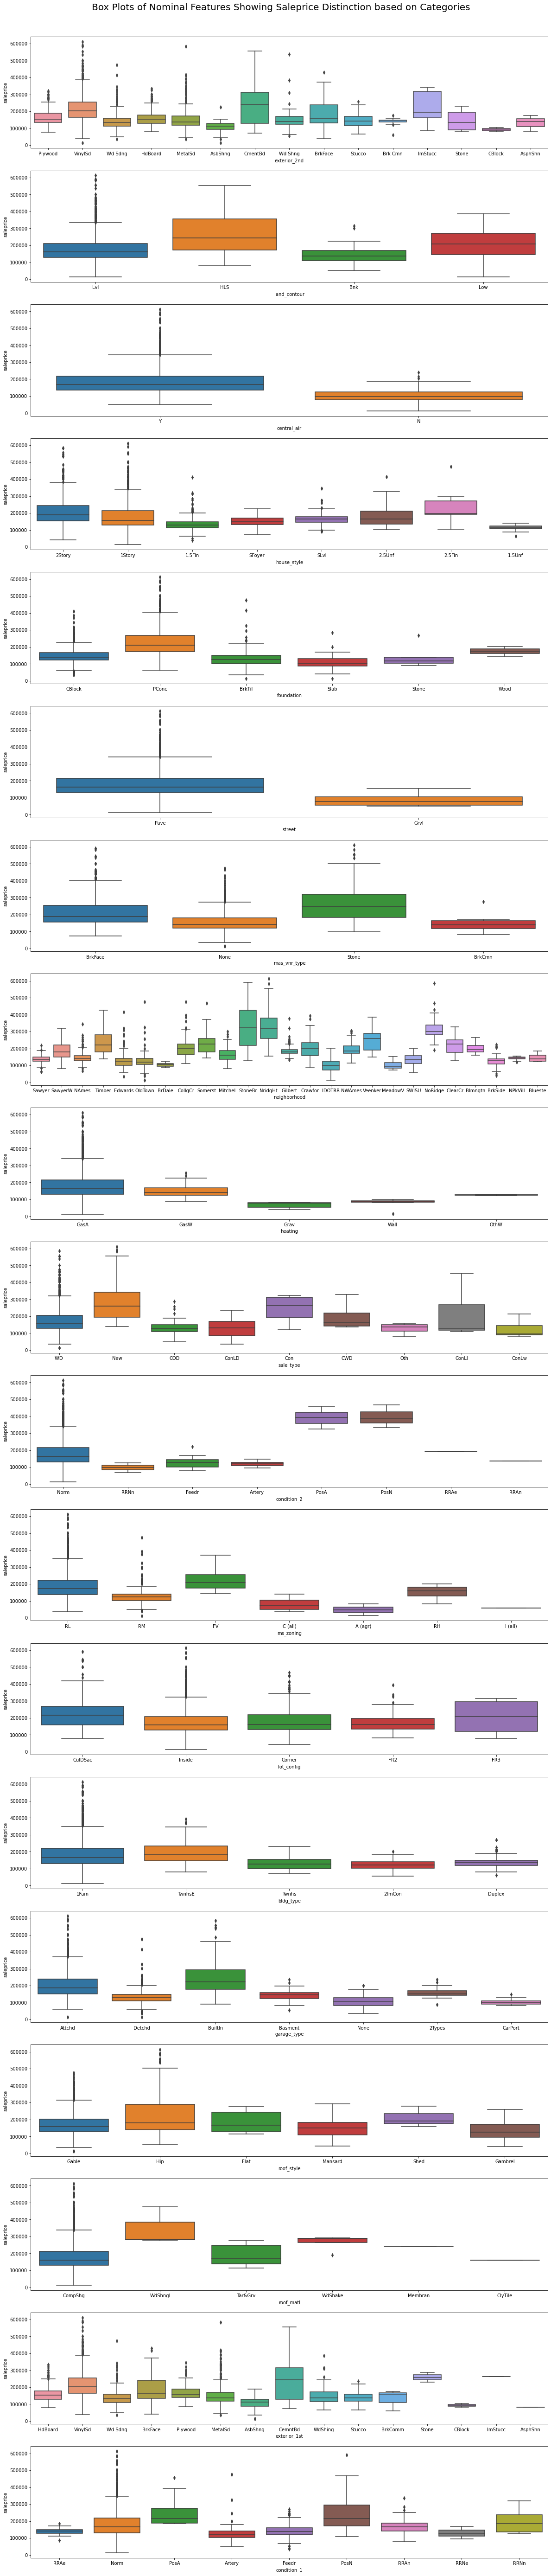

In [137]:
plt.figure(figsize=(20, 100))
plt.tight_layout()
plt.suptitle('Box Plots of Nominal Features Showing Saleprice Distinction based on Categories', fontsize=20, x=0.5, y=0.89)

for i in range(len(nominal)):
    plt.subplot(19, 1, i+1)
    sns.boxplot(x=train[nominal[i]], y=train['saleprice']);



Key observations:
- It seems to show that most nominal features have categories that shows overlapping saleprice
- In this case, they won't be useful features for predicting saleprice and we should consider dropping them
- Based on the boxplots, we are only interested for the following features which have distinct saleprice range amongst its categories:
 - mas_vnr_type
 - exterior_2nd
 - central_air
 - street
 - neighborhood
 - exterior_1st 
 - heating




Before proceeding, we should have a look at each respective feature with a histogram to observe its variability. The thought process is that if the distribution is heavily skewed, it would not make a good predictor of saleprice and we should consider dropping the feature.

## Histogram for all non numeric (nominal) features

We will have a look at the distributions of all non numerical (nominal) features to compare its variability of categories within each feature. 

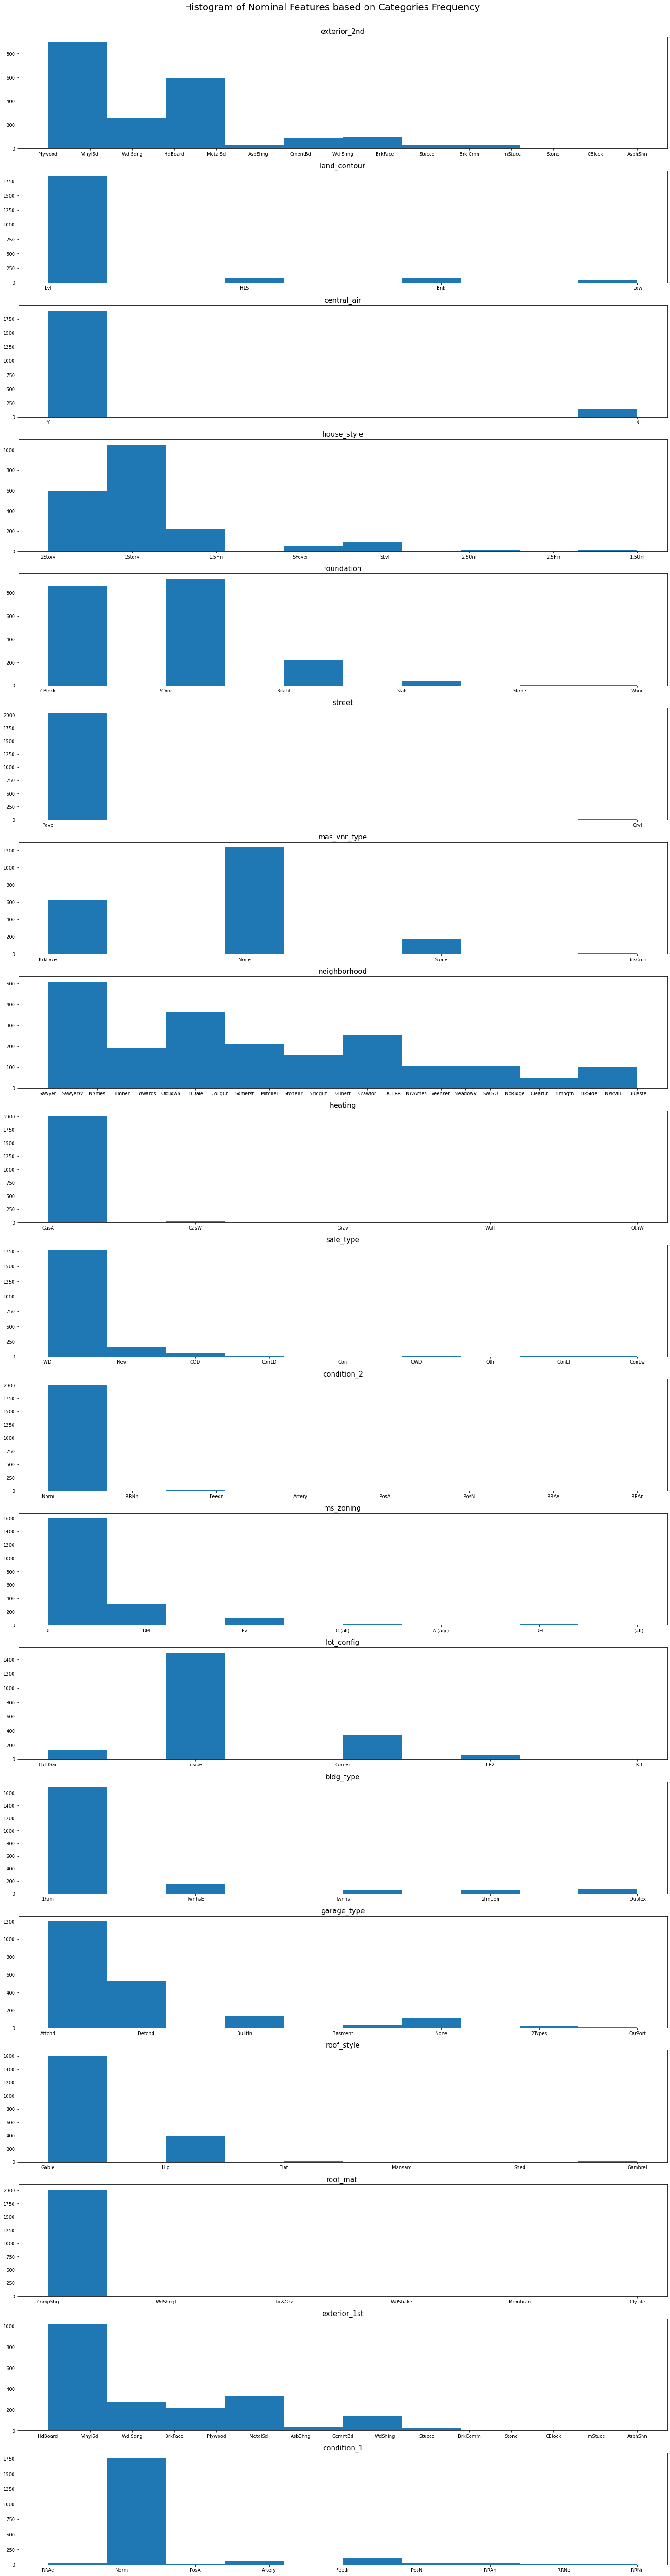

In [138]:
plt.figure(figsize=(25, 100))
plt.tight_layout()
plt.suptitle('Histogram of Nominal Features based on Categories Frequency', fontsize=20, x=0.5, y=0.89)

for i in range(len(nominal)):
    plt.subplot(19, 1, i+1)
    plt.hist(x=train[nominal[i]])
    plt.title(nominal[i], fontsize=15);

Key observations:
- It seems to show that most nominal features have skewed distributions of categories
- In this case, they won't be useful features for predicting saleprice and we should consider dropping them
- Based on the histogram, we are only interested for the following features which have distinct saleprice range amongst its categories:
 - mas_vnr_type
 - exterior_2nd
 - neighborhood
 - exterior_1st

Looking at both the boxplots and histograms of each feature, we can definitely be certain that we should keep mas_vnr_type, exterior_2nd, neighborhood, exterior_1st features.

When we take a closer look at neighborhood as a feature, we can group neighborhoods together based on median saleprice and assign ordinal values based on lowest to highest median saleprice.

Let's have a look at the original neighborhood feature in terms of box plots.

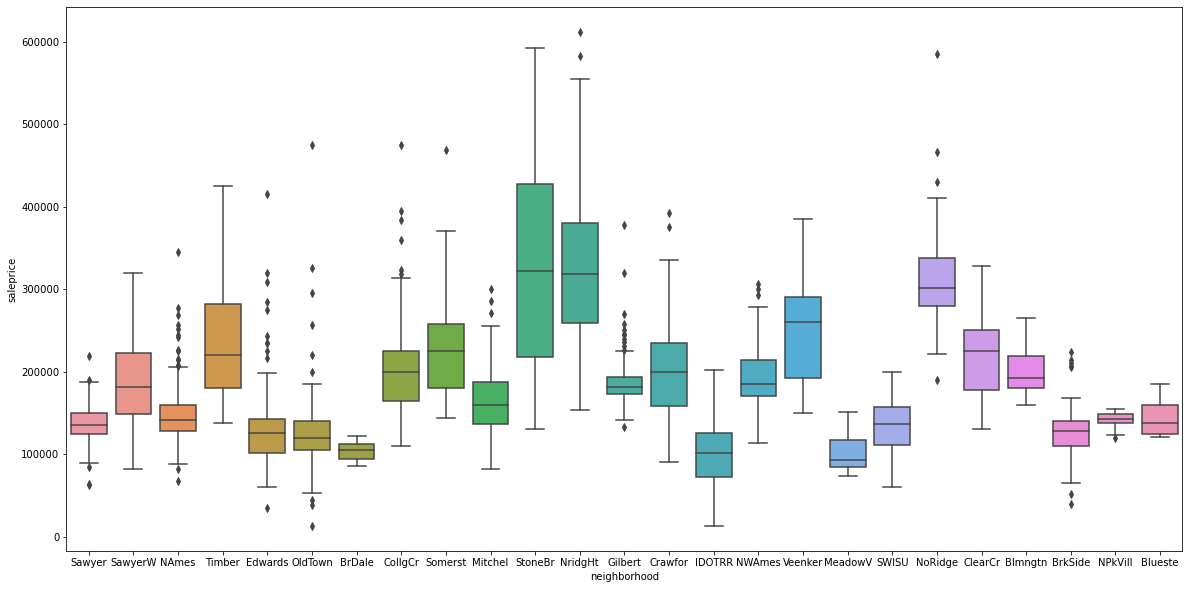

In [139]:
plt.figure(figsize=(20,10))
sns.boxplot(x=train['neighborhood'], y=train['saleprice']);

Now, we will group neighborhoods in groups of 5. There are a total of 25 neighborhoods. Therefore, we can assign a value of 0 for the lowest 5 neighborhoods followed by value of 1 for the next lowest 5 and so on.

In [140]:
# creating a new df with neighborhood and saleprice column
# next, we will group neighborhoods together and aggregate by the median price, followed by sorting from lowest to highest
nhh_price = train[['neighborhood', 'saleprice']]
nhh_rank = nhh_price.groupby('neighborhood').agg(np.median).sort_values(by='saleprice', ascending=True).reset_index()
nhh_rank

,neighborhood,saleprice
0,MeadowV,92450
1,IDOTRR,101500
2,BrDale,105500
3,OldTown,120000
4,Edwards,125000
5,BrkSide,128000
6,Sawyer,135000
7,SWISU,136200
8,Blueste,137500
9,NAmes,141000


We had previously tested ran the notebook using mean as the aggregate instead of median and the models showed us higher RMSE across the board, therefore we would be sticking to median instead.

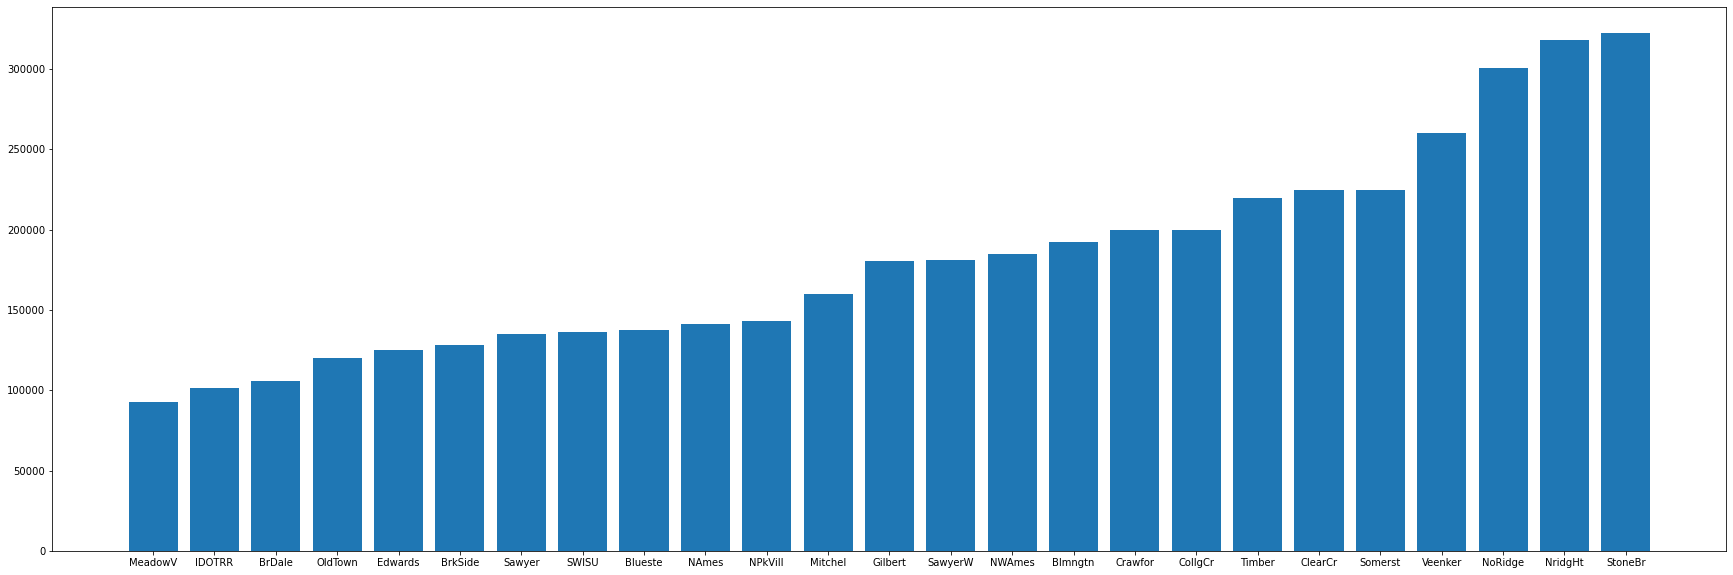

In [141]:
# for illustration purposes of neighborhood median saleprice from lowest to highest
plt.figure(figsize=(30,10))
plt.bar(x=nhh_rank['neighborhood'], height=nhh_rank['saleprice']);

In [142]:
# by median
nhh_vals = {'MeadowV': 0, 'IDOTRR': 0, 'BrDale': 0, 'OldTown': 0, 'Edwards': 0, 
            'BrkSide': 1, 'Sawyer': 1, 'SWISU': 1, 'Blueste': 1, 'NAmes': 1,
            'NPkVill': 2, 'Mitchel': 2, 'Gilbert': 2, 'SawyerW': 2, 'NWAmes': 2,
            'Blmngtn': 3, 'Crawfor': 3, 'CollgCr': 3, 'Timber': 3, 'ClearCr': 3,
            'Somerst': 4, 'Veenker': 4, 'NoRidge': 4, 'NridgHt': 4, 'StoneBr': 4,}

We will map the values to the neighborhood column.

In [143]:
train['neighborhood'] = train['neighborhood'].replace(nhh_vals)

Lastly, let us have a look at our nominal features again:

In [144]:
nominal

['exterior_2nd',
 'land_contour',
 'central_air',
 'house_style',
 'foundation',
 'street',
 'mas_vnr_type',
 'neighborhood',
 'heating',
 'sale_type',
 'condition_2',
 'ms_zoning',
 'lot_config',
 'bldg_type',
 'garage_type',
 'roof_style',
 'roof_matl',
 'exterior_1st',
 'condition_1']

Based off our box plot aand histogram nalysis, we will add the nominal features that we wish to drop in the following list below:

In [145]:
drop_list_col.extend([
 'land_contour',
 'garage_type',
 'central_air',
 'ms_zoning',
 'condition_2',
 'street',
 'sale_type',
 'roof_style',
 'foundation',
 'lot_config',
 'house_style',
 'condition_1',
 'heating',
 'bldg_type',
 'roof_matl'])

Finally, we will make sure that we do not have any duplicated feature names in this list

In [146]:
drop_list_col = list(set(drop_list_col))

In [147]:
drop_list_col

['land_contour',
 'bsmtfin_type_2',
 'central_air',
 'mo_sold',
 'overall_cond',
 'house_style',
 'total_bsmt_sf',
 'foundation',
 'bsmt_half_bath',
 'street',
 'low_qual_fin_sf',
 'yr_sold',
 'bsmt_unf_sf',
 'heating',
 'ms_subclass',
 'sale_type',
 'pool_area',
 'exter_cond',
 'condition_2',
 'ms_zoning',
 'bsmtfin_sf_2',
 'lot_config',
 'enclosed_porch',
 'functional',
 'bldg_type',
 'garage_qual',
 'bedroom_abvgr',
 '3ssn_porch',
 'pid',
 'garage_type',
 'roof_style',
 'utilities',
 'roof_matl',
 'lot_shape',
 'condition_1',
 'misc_val',
 'screen_porch',
 'land_slope',
 'kitchen_abvgr',
 'exter_qual']

In [148]:
len(drop_list_col)

40

## Final Cleaning for train dataset - One Hot Encoder for Nominal Features

We will proceed to convert mas_vnr_type, exterior_2nd, exterior_1st nominal features into numerical. We will also drop the features that we are not interested in based on the 'drop_list_col' list.

Our plan to convert the nominal features is through [One Hot Encoder](https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd). 

One-hot encoding can be applies each category to a integer representation. This is where the integer encoded variable is removed and a new binary variable is added for each unique integer value.

In [149]:
from sklearn.preprocessing import OneHotEncoder

# creating instance of one-hot-encoder
enc = OneHotEncoder(drop='first')

Since we will be creating another dataframe called enc_df which has the default integer based index, we would need to reset the index of the train dataset since the index is based on 'id' column. This is so that when we join both dataframes, there would not be any issues.

In [150]:
train.reset_index(inplace=True)

In [151]:
enc_df = pd.DataFrame(enc.fit_transform(
    train[['mas_vnr_type', 'exterior_2nd', 'exterior_1st']]).toarray(), 
    columns=enc.get_feature_names(['mas_vnr_type', 'exterior_2nd', 'exterior_1st']))

enc_df

,mas_vnr_type_BrkFace,mas_vnr_type_None,mas_vnr_type_Stone,exterior_2nd_AsphShn,exterior_2nd_Brk Cmn,exterior_2nd_BrkFace,exterior_2nd_CBlock,exterior_2nd_CmentBd,exterior_2nd_HdBoard,exterior_2nd_ImStucc,...,exterior_1st_CemntBd,exterior_1st_HdBoard,exterior_1st_ImStucc,exterior_1st_MetalSd,exterior_1st_Plywood,exterior_1st_Stone,exterior_1st_Stucco,exterior_1st_VinylSd,exterior_1st_Wd Sdng,exterior_1st_WdShing
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2035,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2036,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2037,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2038,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [152]:
train = train.join(enc_df)

In [153]:
train.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,...,exterior_1st_CemntBd,exterior_1st_HdBoard,exterior_1st_ImStucc,exterior_1st_MetalSd,exterior_1st_Plywood,exterior_1st_Stone,exterior_1st_Stucco,exterior_1st_VinylSd,exterior_1st_Wd Sdng,exterior_1st_WdShing
0,109,533352170,60,RL,68.0,13517,Pave,2,Lvl,3,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,544,531379050,60,RL,43.0,11492,Pave,2,Lvl,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,153,535304180,20,RL,68.0,7922,Pave,3,Lvl,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,318,916386060,60,RL,73.0,9802,Pave,3,Lvl,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,255,906425045,50,RL,82.0,14235,Pave,2,Lvl,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


After One Hot Encoding, we proceed to drop the original 3 nominal columns: mas_vnr_type, exterior_2nd, exterior_1st

In [154]:
train.drop(columns=['mas_vnr_type', 'exterior_2nd', 'exterior_1st'], inplace=True)

We will finally drop the features which are not very useful as a predictor for saleprice using our drop_list_col list

In [155]:
train.shape

(2040, 104)

In [156]:
train.drop(columns=drop_list_col, inplace=True)

In [157]:
train.shape

(2040, 64)

A final check that all null values are accounted for and all features converted into numerals.

In [238]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2040 entries, 0 to 2039
Data columns (total 64 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    2040 non-null   int64  
 1   lot_frontage          2040 non-null   float64
 2   lot_area              2040 non-null   int64  
 3   neighborhood          2040 non-null   int64  
 4   overall_qual          2040 non-null   int64  
 5   year_built            2040 non-null   int64  
 6   year_remod_add        2040 non-null   int64  
 7   mas_vnr_area          2040 non-null   float64
 8   bsmt_qual             2040 non-null   int64  
 9   bsmt_cond             2040 non-null   int64  
 10  bsmt_exposure         2040 non-null   int64  
 11  bsmtfin_type_1        2040 non-null   int64  
 12  bsmtfin_sf_1          2040 non-null   float64
 13  heating_qc            2040 non-null   int64  
 14  electrical            2040 non-null   int64  
 15  1st_flr_sf           

In [158]:
train.head()

,id,lot_frontage,lot_area,neighborhood,overall_qual,year_built,year_remod_add,mas_vnr_area,bsmt_qual,bsmt_cond,...,exterior_1st_CemntBd,exterior_1st_HdBoard,exterior_1st_ImStucc,exterior_1st_MetalSd,exterior_1st_Plywood,exterior_1st_Stone,exterior_1st_Stucco,exterior_1st_VinylSd,exterior_1st_Wd Sdng,exterior_1st_WdShing
0,109,68.0,13517,1,6,1976,2005,289.0,3,3,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,544,43.0,11492,2,7,1996,1997,132.0,4,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,153,68.0,7922,1,5,1953,2007,0.0,3,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,318,73.0,9802,3,5,2006,2007,0.0,4,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,255,82.0,14235,2,6,1900,1993,0.0,2,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


We will save a cleaned version of the train dataset to be used for preprocessing in the next notebook.

In [159]:
train.to_csv('../datasets/cleaned_train.csv', index=False)

# Data Cleaning for Test Dataset

We will read in the data of the test dataset.

In [160]:
test = pd.read_csv('../datasets/new_test.csv')

In [161]:
test.shape

(879, 80)

In [162]:
test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


Similar to the train dataset, we will format feature names of the test dataset appropriately by calling our function: format_column_name.

In [163]:
format_column_name(test)

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874,1662,527377110,60,RL,80.0,8000,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,11,2007,WD
875,1234,535126140,60,RL,90.0,14670,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,MnPrv,NaN,0,8,2008,WD
876,1373,904100040,20,RL,55.0,8250,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2008,WD
877,1672,527425140,20,RL,60.0,9000,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,GdWo,NaN,0,5,2007,WD


We will clean the dataset as per train dataset. We will examine the missing values for this dataset.

In [164]:
test.isnull().sum().sort_values(ascending=False)

pool_qc          875
misc_feature     838
alley            821
fence            707
fireplace_qu     422
                ... 
bsmt_unf_sf        0
total_bsmt_sf      0
pid                0
heating_qc         0
sale_type          0
Length: 80, dtype: int64

Let us examine the missing values by percentage basis, ranked from highest to lowest.

In [165]:
test.isnull().mean().sort_values(ascending=False)

pool_qc          0.995449
misc_feature     0.953356
alley            0.934016
fence            0.804323
fireplace_qu     0.480091
                   ...   
bsmt_unf_sf      0.000000
total_bsmt_sf    0.000000
pid              0.000000
heating_qc       0.000000
sale_type        0.000000
Length: 80, dtype: float64

Similarly, we will drop columns with missing values of more than 40%. The columns will be pool_qc, misc_feataure, alley, fence and fireplace_qu

In [166]:
drop_cols = ['pool_qc', 'misc_feature', 'alley', 'fence', 'fireplace_qu']
test = test.drop(drop_cols, axis=1)

The shape of the test dataset differs by 1 column because there is no saleprice column in it

Similarly, we will also use the ID column as our index.

In [167]:
test.set_index('id', inplace=True)
test.head()

,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,...,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type
id,,,,,,,,,,,,,,,,,,,,,
2658,902301120,190,RM,69.0,9142,Pave,Reg,Lvl,AllPub,Inside,...,0,60,112,0,0,0,0,4,2006,WD
2718,905108090,90,RL,NaN,9662,Pave,IR1,Lvl,AllPub,Inside,...,170,0,0,0,0,0,0,8,2006,WD
2414,528218130,60,RL,58.0,17104,Pave,IR1,Lvl,AllPub,Inside,...,100,24,0,0,0,0,0,9,2006,New
1989,902207150,30,RM,60.0,8520,Pave,Reg,Lvl,AllPub,Inside,...,0,0,184,0,0,0,0,7,2007,WD
625,535105100,20,RL,NaN,9500,Pave,IR1,Lvl,AllPub,Inside,...,0,76,0,0,185,0,0,7,2009,WD


## Check that data types for each column is appropriate

In [168]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 879 entries, 2658 to 1939
Data columns (total 74 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pid              879 non-null    int64  
 1   ms_subclass      879 non-null    int64  
 2   ms_zoning        879 non-null    object 
 3   lot_frontage     719 non-null    float64
 4   lot_area         879 non-null    int64  
 5   street           879 non-null    object 
 6   lot_shape        879 non-null    object 
 7   land_contour     879 non-null    object 
 8   utilities        879 non-null    object 
 9   lot_config       879 non-null    object 
 10  land_slope       879 non-null    object 
 11  neighborhood     879 non-null    object 
 12  condition_1      879 non-null    object 
 13  condition_2      879 non-null    object 
 14  bldg_type        879 non-null    object 
 15  house_style      879 non-null    object 
 16  overall_qual     879 non-null    int64  
 17  overall_cond

Data types looks good. Test data has no salesprice column because that is what we would want to predict

## Summary of missing values and suggested actions

In [169]:
test.isnull().sum()

pid               0
ms_subclass       0
ms_zoning         0
lot_frontage    160
lot_area          0
               ... 
pool_area         0
misc_val          0
mo_sold           0
yr_sold           0
sale_type         0
Length: 74, dtype: int64

Below is a summary table of missing values and our suggested action. We will treat the missing values accordingly as per our train dataset.

Note that as part of Kaggle's submission, we will not be able to drop any rows from the test set and must maintain all 878 rows.

Note that we are ignoring certain features because we will be dropping them based on our 'drop_list_col' list since they are not useful as a predictor for price, similar to our train dataset.

|Feature|Type|Missing Value|Notes|Action|
|---|---|---|---|---|
|lot_frontage|Continuous|160|Missing value|impute NaN values with median value|
|mas_vnr_type|Nominal|1|NaN because None|set null values to None|
|mas_vnr_area|Continuous|1|Missing value|set null values to 0, check '0' rows should have mas_vnr_type = 'None|
|bsmt_qual|Ordinal|25|NaN because no basement|set null values to None|
|bsmt_cond|Ordinal|25|NaN because no basement|set null values to None|
|bsmt_exposure|Ordinal|25|NaN because no basement|set null values to None|
|bsmtfin_type_1|Ordinal|25|Missing value|set null values to None|
|bsmtfin_type_2|Ordinal|25|NaN because no basement|ignore feature as we will drop it later due to low correlation|
|electrical|Ordinal|1|Missing value|set null values to None|
|garage_type|Nominal|44|Missing value|set null values to None|
|garage_yr_blt|Discrete|45|Missing value|set null values to None|
|garage_finish|Ordinal|45|Missing value|set null values to None|
|garage_qual|Ordinal|45|Missing value|set null values to None|
|garage_cond|Ordinal|45|Missing value|set null values to None|

We will now proceed to clean the dataset column by column.

### Lot frontage column

In [170]:
test['lot_frontage'].isnull().sum()

160

Based on the data dictionary, lot frontage is defined as continuous variable of Linear feet of street connected to property. It is unlikely for houses to not have lot frontage so we can't just fillna(0 or 'None')

In [171]:
test['lot_frontage'].describe()

count    719.000000
mean      69.630042
std       23.625372
min       21.000000
25%       59.000000
50%       68.000000
75%       80.000000
max      182.000000
Name: lot_frontage, dtype: float64

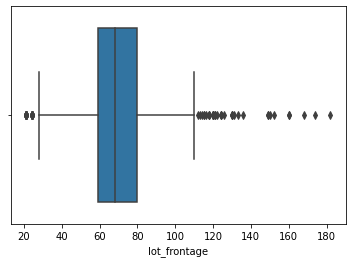

In [172]:
sns.boxplot(x=test['lot_frontage']);

Although there are outliers, visually they do not seem to much impact on the regularity of the box plot. Let's keep them and instead impute the NaN values with the median (median = 68)

In [173]:
test['lot_frontage'] = test['lot_frontage'].replace(np.nan, test['lot_frontage'].median())

In [174]:
test['lot_frontage'].isnull().sum()

0

### Veneer columns

We will check the row with "Mas Vnr Area" = NaN also have "Mas Vnr Type" = NaN. Logically, you cannot have veneer areas if there is no veneer

In [175]:
test.loc[(test['mas_vnr_area'].isnull()) &
         (test['mas_vnr_type'].isnull()), 
         ['mas_vnr_area', 'mas_vnr_type']]

,mas_vnr_area,mas_vnr_type
id,,
868,NaN,NaN


In [176]:
test['mas_vnr_type'].value_counts(dropna=False)

None       534
BrkFace    250
Stone       81
BrkCmn      12
NaN          1
CBlock       1
Name: mas_vnr_type, dtype: int64

We would dropped this row because it is a missing value. However, since we can't drop rows for the test dataset, we would fill the null values with fillna(0) for mas_vnr_area column and fillna('None') for mas_vnr_type column. This 1 row should not have much impact on the models later.

In [177]:
test['mas_vnr_area'] = test['mas_vnr_area'].fillna(0)

Double check all null values are filled

In [178]:
test['mas_vnr_area'].isnull().sum()

0

Fill null values with fillna('None') for mas_vnr_type column

In [179]:
test['mas_vnr_type'] = test['mas_vnr_type'].fillna('None')

Double check all null values are filled

In [180]:
test['mas_vnr_type'].isnull().sum()

0

It is not possible for any house to have no veneer type yet have area > 0. Let's check for any rows that have veneer area > 0 but veneer type is None 

In [181]:
test.loc[(test['mas_vnr_area'] > 0) &
      (test['mas_vnr_type'] == 'None'),
      ['mas_vnr_area', 'mas_vnr_type']
     ]

,mas_vnr_area,mas_vnr_type
id,,
442,285.0,None
404,312.0,None


Let's set these rows for veneer area = 0

In [182]:
test.loc[(test['mas_vnr_type'] == 'None'), ['mas_vnr_area']] = 0

### Basement columns

Column: bsmt_qual - let's observe our null rows

In [183]:
test['bsmt_qual'].value_counts(dropna=False)

TA     396
Gd     355
Ex      74
Fa      28
NaN     25
Po       1
Name: bsmt_qual, dtype: int64

In [184]:
test.loc[(test['bsmt_qual'].isnull()), 'bsmt_qual':]

,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,...,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type
id,,,,,,,,,,,,,,,,,,,,,
2089,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,...,116,0,0,180,0,0,0,6,2007,WD
2071,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,...,0,0,140,0,0,0,0,5,2007,WD
971,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,...,0,0,0,0,0,0,0,11,2009,WD
1887,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,...,0,0,0,0,0,0,1200,7,2007,WD
2005,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,...,0,40,0,0,0,0,0,5,2007,WD
1507,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,...,0,0,0,0,0,0,0,4,2008,WD
899,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasW,...,0,0,0,0,0,0,0,7,2009,WD
2623,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,...,0,29,0,0,0,0,0,7,2006,WD
1269,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,...,0,27,0,0,0,0,0,7,2008,WD


As per the data dictionary, since bsmt_qual is an ordinal variable, we should change all NaN values into 'None'

In [185]:
test['bsmt_qual'] = test['bsmt_qual'].fillna('None')

Double check that all NaN values are filled

In [186]:
test['bsmt_qual'].isnull().sum()

0

Column: bsmt_exposure - similarly, we check the rows with NaN values

In [187]:
test['bsmt_exposure'].value_counts(dropna=False)

No     567
Av     130
Gd      81
Mn      76
NaN     25
Name: bsmt_exposure, dtype: int64

Similarly, change all NaN values into 'None'

In [188]:
test['bsmt_exposure'] = test['bsmt_exposure'].fillna('None')

In [189]:
test['bsmt_exposure'].isnull().sum()

0

Column: bsmtfin_type_1 - similarly, we check the rows with NaN values

In [190]:
test['bsmtfin_type_1'].value_counts(dropna=False)

Unf    248
GLQ    244
ALQ    136
Rec    105
BLQ     69
LwQ     52
NaN     25
Name: bsmtfin_type_1, dtype: int64

Similarly, change all NaN values into 'None'

In [191]:
test['bsmtfin_type_1'] = test['bsmtfin_type_1'].fillna('None')

In [192]:
test['bsmtfin_type_1'].isnull().sum()

0

Column: bsmt_cond - similarly, we check the rows with NaN values

In [193]:
test['bsmt_cond'].value_counts(dropna=False)

TA     782
Fa      39
Gd      33
NaN     25
Name: bsmt_cond, dtype: int64

Similarly, change all NaN values into 'None'

In [194]:
test['bsmt_cond'] = test['bsmt_cond'].fillna('None')

In [195]:
test['bsmt_cond'].isnull().sum()

0

### Garage columns

Finally, let's check the NaN value rows for garage_type, garage_yr_blt, garage_finish, garage_qual and garage_cond

In [196]:
test.loc[test['garage_finish'].isnull(), 'garage_type':]

,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type
id,,,,,,,,,,,,,,,,,,
1904,NaN,NaN,NaN,0,0,NaN,NaN,N,0,21,0,0,0,0,2000,7,2007,WD
979,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,0,5,2009,WD
2362,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,0,6,2006,WD
2188,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,286,0,0,0,0,5,2007,WD
1988,NaN,NaN,NaN,0,0,NaN,NaN,Y,58,42,0,0,0,0,0,8,2007,WD
217,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,58,0,0,0,0,0,5,2010,WD
2908,NaN,NaN,NaN,0,0,NaN,NaN,Y,36,56,0,0,0,0,0,7,2006,WD
1507,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,0,4,2008,WD
1368,NaN,NaN,NaN,0,0,NaN,NaN,N,0,98,0,0,0,0,0,9,2008,ConLD


In [197]:
test.loc[test['garage_finish'].isnull(), 'garage_finish':].shape

(45, 16)

Row id: 1357 has data on garage_type, garage_cars and garage_area. Ideally, we would drop this row but for the Kaggle submission, we will instead convert the data to 0 and None respectively.

In [198]:
test.loc[[1357], 'garage_type':]

,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type
id,,,,,,,,,,,,,,,,,,
1357,Detchd,NaN,NaN,1,360,NaN,NaN,Y,64,0,180,0,0,0,1000,9,2008,WD


In [199]:
test.loc[[1357], 'garage_type'] = None

In [200]:
test.loc[[1357], 'garage_cars'] = 0

In [201]:
test.loc[[1357], 'garage_area'] = 0

Double check that the data are replaced appropriately.

In [202]:
test.loc[[1357], 'garage_type':]

,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type
id,,,,,,,,,,,,,,,,,,
1357,None,NaN,NaN,0,0,NaN,NaN,Y,64,0,180,0,0,0,1000,9,2008,WD


The remaining 44 NaN rows for garage_finish, garage_qual and garage_cond are in the same rows. We will look at their values within these 3 columns.

In [203]:
test['garage_type'].value_counts(dropna=False)

Attchd     518
Detchd     245
BuiltIn     54
NaN         45
Basment      9
CarPort      4
2Types       4
Name: garage_type, dtype: int64

In this case, No Garage has been misrepresented as NaN.

In [204]:
test['garage_finish'].value_counts(dropna=False)

Unf    382
RFn    233
Fin    219
NaN     45
Name: garage_finish, dtype: int64

In this case, No Garage has been misrepresented as NaN.

In [205]:
test['garage_cond'].value_counts(dropna=False)

TA     797
NaN     45
Fa      27
Po       6
Gd       3
Ex       1
Name: garage_cond, dtype: int64

In this case, No Garage has been misrepresented as NaN.

Similarly, we will fill all NaN values for garage_type, garage_finish, garage_qual and garage_cond into 'None'. We will fill all NaN values for garage_yr_blt into 0. 

In [206]:
test['garage_type'] = test['garage_type'].fillna('None')
test['garage_finish'] = test['garage_finish'].fillna('None')
test['garage_qual'] = test['garage_qual'].fillna('None')
test['garage_cond'] = test['garage_cond'].fillna('None')
test['garage_yr_blt'] = test['garage_yr_blt'].fillna(0)

We will check that all null values are filled.

In [207]:
print(test['garage_type'].isnull().sum())
print(test['garage_finish'].isnull().sum())
print(test['garage_qual'].isnull().sum())
print(test['garage_cond'].isnull().sum()) 
print(test['garage_yr_blt'].isnull().sum())

0
0
0
0
0


### Electrical column

Check the row with missing value

In [208]:
test.loc[test['electrical'].isnull(), :]

,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,...,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type
id,,,,,,,,,,,,,,,,,,,,,
1578,916386080,80,RL,73.0,9735,Pave,Reg,Lvl,AllPub,Inside,...,100,0,0,0,0,0,0,5,2008,WD


In [209]:
test['electrical'].value_counts(dropna=False)

SBrkr    814
FuseA     48
FuseF     15
NaN        1
FuseP      1
Name: electrical, dtype: int64

Based on existing values in the column, the NaN value is likely to be Mix. We shall fill it with that.

In [210]:
test['electrical'] = test['electrical'].fillna('Mix')

In [211]:
test['electrical'].isnull().sum()

0

## Neighborhood column

Similarly, there are 3 neighborhoods: greens, grnhill and landmrk which are not in the data dictionary. We will proceed to find the rows which have these neighbhorhoods.

In [212]:
test[(test['neighborhood'].str.lower() == 'landmrk') |
      (test['neighborhood'].str.lower() == 'grnhill') |
      (test['neighborhood'].str.lower() == 'greens')
     ]

,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,...,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type
id,,,,,,,,,,,,,,,,,,,,,
2519,533253030,120,RL,68.0,3760,Pave,IR1,Lvl,AllPub,CulDSac,...,133,78,0,0,0,0,0,5,2006,WD
107,533253060,120,RL,30.0,4420,Pave,IR1,Lvl,AllPub,CulDSac,...,133,42,0,0,0,0,0,6,2010,WD
576,533253070,120,RL,61.0,3782,Pave,IR1,Lvl,AllPub,CulDSac,...,133,78,0,0,0,0,0,9,2009,WD
2520,533253050,120,RL,36.0,3640,Pave,IR1,Lvl,AllPub,CulDSac,...,133,108,0,0,0,0,0,9,2006,WD
1858,533253180,120,RL,40.0,3840,Pave,IR1,Lvl,AllPub,Inside,...,133,89,0,0,0,0,0,7,2007,WD


In a typical case, we would have dropped these 5 rows to be consistent with the train dataset. However, as part of the Kaggle's submission to maintain all test set rows, we will instead impute them by classifying them as the median ordinal ranking in 'nhh_vals' which is 2.

In [213]:
nhh_vals

{'MeadowV': 0,
 'IDOTRR': 0,
 'BrDale': 0,
 'OldTown': 0,
 'Edwards': 0,
 'BrkSide': 1,
 'Sawyer': 1,
 'SWISU': 1,
 'Blueste': 1,
 'NAmes': 1,
 'NPkVill': 2,
 'Mitchel': 2,
 'Gilbert': 2,
 'SawyerW': 2,
 'NWAmes': 2,
 'Blmngtn': 3,
 'Crawfor': 3,
 'CollgCr': 3,
 'Timber': 3,
 'ClearCr': 3,
 'Somerst': 4,
 'Veenker': 4,
 'NoRidge': 4,
 'NridgHt': 4,
 'StoneBr': 4}

In [214]:
test.loc[test['neighborhood'].str.lower() == 'greens', ['neighborhood']] = 2

Ensuring that the values have been replaced appropriately and there are no more 'greens' in neighborhood column.

In [215]:
test['neighborhood'].value_counts()

NAmes      133
CollgCr     87
OldTown     76
Somerst     52
Edwards     51
Gilbert     49
NWAmes      44
NridgHt     44
Sawyer      40
SawyerW     38
BrkSide     32
Mitchel     32
Crawfor     32
Timber      24
IDOTRR      24
NoRidge     23
ClearCr     17
SWISU       16
MeadowV     13
StoneBr     13
BrDale      11
Veenker      7
NPkVill      6
Blmngtn      6
2            5
Blueste      4
Name: neighborhood, dtype: int64

Similar to how we handled the neighborhood column in the train dataset, we will be mapping values to the rest of each category using 'nhh_vals'.

In [216]:
test['neighborhood'] = test['neighborhood'].replace(nhh_vals)

## Dropping features not useful as predictors

Additionally, we will also drop all the features that are in the drop_list_col which we did earlier for our train dataset.

In [217]:
test = test.drop(columns=drop_list_col)

In [218]:
test.isnull().sum()

lot_frontage      0
lot_area          0
neighborhood      0
overall_qual      0
year_built        0
year_remod_add    0
exterior_1st      0
exterior_2nd      0
mas_vnr_type      0
mas_vnr_area      0
bsmt_qual         0
bsmt_cond         0
bsmt_exposure     0
bsmtfin_type_1    0
bsmtfin_sf_1      0
heating_qc        0
electrical        0
1st_flr_sf        0
2nd_flr_sf        0
gr_liv_area       0
bsmt_full_bath    0
full_bath         0
half_bath         0
kitchen_qual      0
totrms_abvgrd     0
fireplaces        0
garage_yr_blt     0
garage_finish     0
garage_cars       0
garage_area       0
garage_cond       0
paved_drive       0
wood_deck_sf      0
open_porch_sf     0
dtype: int64

We have verified that all missing values are accounted for.

In [219]:
test.shape

(879, 34)

## Checking the non numeric columns

Similar to the test dataset, we would like to look out for any unique labels as well as determine if column is categorical or ordinal

In [220]:
test.head()

,lot_frontage,lot_area,neighborhood,overall_qual,year_built,year_remod_add,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,...,totrms_abvgrd,fireplaces,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_cond,paved_drive,wood_deck_sf,open_porch_sf
id,,,,,,,,,,,,,,,,,,,,,
2658,69.0,9142,0,6,1910,1950,AsbShng,AsbShng,None,0.0,...,9,0,1910.0,Unf,1,440,Po,Y,0,60
2718,68.0,9662,1,5,1977,1977,Plywood,Plywood,None,0.0,...,10,0,1977.0,Fin,2,580,TA,Y,170,0
2414,58.0,17104,2,7,2006,2006,VinylSd,VinylSd,None,0.0,...,7,1,2006.0,RFn,2,426,TA,Y,100,24
1989,60.0,8520,0,5,1923,2006,Wd Sdng,Wd Sdng,None,0.0,...,5,0,1935.0,Unf,2,480,TA,N,0,0
625,68.0,9500,1,6,1963,1963,Plywood,Plywood,BrkFace,247.0,...,6,2,1963.0,RFn,2,514,TA,Y,0,76


In [221]:
test_objects = test.select_dtypes(include=['object'])
test_objects.shape

(879, 13)

In [222]:
for x in range(9):
    print('column name: ', test_objects.columns[x])
    print('missing values: ', test_objects.iloc[:, x].isnull().sum())
    print(test_objects.iloc[:, x].value_counts())
    print()

column name:  exterior_1st
missing values:  0
VinylSd    302
Wd Sdng    144
HdBoard    142
MetalSd    119
Plywood     69
CemntBd     36
BrkFace     24
Stucco      16
AsbShng     11
WdShing     11
BrkComm      3
AsphShn      1
PreCast      1
Name: exterior_1st, dtype: int64

column name:  exterior_2nd
missing values:  0
VinylSd    294
Wd Sdng    135
HdBoard    131
MetalSd    123
Plywood     89
CmentBd     36
Wd Shng     18
Stucco      17
BrkFace     13
AsbShng     10
Brk Cmn      5
ImStucc      4
CBlock       1
AsphShn      1
PreCast      1
Other        1
Name: exterior_2nd, dtype: int64

column name:  mas_vnr_type
missing values:  0
None       535
BrkFace    250
Stone       81
BrkCmn      12
CBlock       1
Name: mas_vnr_type, dtype: int64

column name:  bsmt_qual
missing values:  0
TA      396
Gd      355
Ex       74
Fa       28
None     25
Po        1
Name: bsmt_qual, dtype: int64

column name:  bsmt_cond
missing values:  0
TA      782
Fa       39
Gd       33
None     25
Name: bsmt_co

Similar to train dataset, ordinal variables which we need to map into ordinal ranking values:

 
- bsmt_qual (use bsmt_vals to map)

- bsmt_cond (use bsmt_vals to map)
 
- bsmt_exposure (use bsmt_expo_vals to map)

- bsmtfin_type_1 (use bsmt_fin_vals to map)

- electrical (use electric_vals to map)

- heating_qc (use bsmt_expo_vals to map)

- kitchen_qual (use bsmt_fin_vals to map)

- garage_finish (use gar_fin_vals to map)


For the remaining ordinal variables, we will map ordinal ranking values 

In [223]:
test['bsmt_qual'] = test['bsmt_qual'].replace(bsmt_vals)
test['bsmt_cond'] = test['bsmt_cond'].replace(bsmt_vals)
test['bsmt_exposure'] = test['bsmt_exposure'].replace(bsmt_expo_vals)
test['bsmtfin_type_1'] = test['bsmtfin_type_1'].replace(bsmt_fin_vals)
test['electrical'] = test['electrical'].replace(electric_vals)
test['heating_qc'] = test['heating_qc'].replace(bsmt_vals)
test['kitchen_qual'] = test['kitchen_qual'].replace(bsmt_vals)
test['garage_finish'] = test['garage_finish'].replace(gar_fin_vals)
test['garage_cond'] = test['garage_cond'].replace(bsmt_vals)
test['paved_drive'] = test['paved_drive'].replace(pav_vals)

Ensure that our values are mapped correctly

In [224]:
print(test['bsmt_qual'].value_counts())
print(test['bsmt_cond'].value_counts())
print(test['bsmt_exposure'].value_counts())
print(test['bsmtfin_type_1'].value_counts()) 
print(test['electrical'].value_counts())
print(test['heating_qc'].value_counts()) 
print(test['kitchen_qual'].value_counts()) 
print(test['garage_finish'].value_counts()) 
print(test['garage_cond'].value_counts())
print(test['paved_drive'].value_counts())

3    396
4    355
5     74
2     28
0     25
1      1
Name: bsmt_qual, dtype: int64
3    782
2     39
4     33
0     25
Name: bsmt_cond, dtype: int64
1    567
3    130
4     81
2     76
0     25
Name: bsmt_exposure, dtype: int64
1    248
6    244
5    136
3    105
4     69
2     52
0     25
Name: bsmtfin_type_1, dtype: int64
4    814
3     48
2     15
0      1
1      1
Name: electrical, dtype: int64
5    430
3    267
4    157
2     25
Name: heating_qc, dtype: int64
3    447
4    354
5     54
2     23
1      1
Name: kitchen_qual, dtype: int64
1    382
2    233
3    219
0     45
Name: garage_finish, dtype: int64
3    797
0     45
2     27
1      6
4      3
5      1
Name: garage_cond, dtype: int64
2    791
0     65
1     23
Name: paved_drive, dtype: int64


## OneHotEncoder for Nominal Features

To convert the nominal features is through One Hot Encoder as per train dataset.

In [225]:
# creating instance of one-hot-encoder
enc = OneHotEncoder(drop='first')

Since we will be creating another dataframe called enc_df which has the default integer based index, we would need to reset the index of the test dataset since the index is based on 'id' column. This is so that when we join both dataframes, there would not be any issues.

In [226]:
test.reset_index(inplace=True)

In [227]:
enc_df_test = pd.DataFrame(enc.fit_transform(
    test[['mas_vnr_type', 'exterior_2nd', 'exterior_1st']]).toarray(), 
    columns=enc.get_feature_names(['mas_vnr_type', 'exterior_2nd', 'exterior_1st']))

enc_df_test

,mas_vnr_type_BrkFace,mas_vnr_type_CBlock,mas_vnr_type_None,mas_vnr_type_Stone,exterior_2nd_AsphShn,exterior_2nd_Brk Cmn,exterior_2nd_BrkFace,exterior_2nd_CBlock,exterior_2nd_CmentBd,exterior_2nd_HdBoard,...,exterior_1st_BrkFace,exterior_1st_CemntBd,exterior_1st_HdBoard,exterior_1st_MetalSd,exterior_1st_Plywood,exterior_1st_PreCast,exterior_1st_Stucco,exterior_1st_VinylSd,exterior_1st_Wd Sdng,exterior_1st_WdShing
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
875,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
876,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
877,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [228]:
test = test.join(enc_df_test)

After One Hot Encoding, we proceed to drop the original 3 nominal columns: mas_vnr_type, exterior_2nd, exterior_1st

In [229]:
test.drop(columns=['mas_vnr_type', 'exterior_2nd', 'exterior_1st'], inplace=True)

# Final Check

A final check on test train dataset to see if everything is good

In [239]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 63 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    879 non-null    int64  
 1   lot_frontage          879 non-null    float64
 2   lot_area              879 non-null    int64  
 3   neighborhood          879 non-null    int64  
 4   overall_qual          879 non-null    int64  
 5   year_built            879 non-null    int64  
 6   year_remod_add        879 non-null    int64  
 7   mas_vnr_area          879 non-null    float64
 8   bsmt_qual             879 non-null    int64  
 9   bsmt_cond             879 non-null    int64  
 10  bsmt_exposure         879 non-null    int64  
 11  bsmtfin_type_1        879 non-null    int64  
 12  bsmtfin_sf_1          879 non-null    int64  
 13  heating_qc            879 non-null    int64  
 14  electrical            879 non-null    int64  
 15  1st_flr_sf            8

In [230]:
test.head()

,id,lot_frontage,lot_area,neighborhood,overall_qual,year_built,year_remod_add,mas_vnr_area,bsmt_qual,bsmt_cond,...,exterior_1st_BrkFace,exterior_1st_CemntBd,exterior_1st_HdBoard,exterior_1st_MetalSd,exterior_1st_Plywood,exterior_1st_PreCast,exterior_1st_Stucco,exterior_1st_VinylSd,exterior_1st_Wd Sdng,exterior_1st_WdShing
0,2658,69.0,9142,0,6,1910,1950,0.0,2,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2718,68.0,9662,1,5,1977,1977,0.0,4,3,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2414,58.0,17104,2,7,2006,2006,0.0,4,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1989,60.0,8520,0,5,1923,2006,0.0,3,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,625,68.0,9500,1,6,1963,1963,247.0,4,3,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [231]:
test.shape

(879, 63)

In [232]:
train.head()

,id,lot_frontage,lot_area,neighborhood,overall_qual,year_built,year_remod_add,mas_vnr_area,bsmt_qual,bsmt_cond,...,exterior_1st_CemntBd,exterior_1st_HdBoard,exterior_1st_ImStucc,exterior_1st_MetalSd,exterior_1st_Plywood,exterior_1st_Stone,exterior_1st_Stucco,exterior_1st_VinylSd,exterior_1st_Wd Sdng,exterior_1st_WdShing
0,109,68.0,13517,1,6,1976,2005,289.0,3,3,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,544,43.0,11492,2,7,1996,1997,132.0,4,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,153,68.0,7922,1,5,1953,2007,0.0,3,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,318,73.0,9802,3,5,2006,2007,0.0,4,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,255,82.0,14235,2,6,1900,1993,0.0,2,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [233]:
train.shape

(2040, 64)

We will save a cleaned version of the test dataset to be used for preprocessing in the next notebook.

In [234]:
test.to_csv('../datasets/cleaned_test.csv', index=False)